In [1]:
# Library
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Pemodelan Prediksi Curah Hujan sebagai Strategi Penanggulangan Banjir Provinsi Kalimantan Selatan

# Latar Belakang
Salah satu bencana alam yang menjadi masalah umum di masyarakat dan sulit diprediksi adalah banjir. Banjir memiliki dampak luas dan menyebabkan kerugian besar. Berdasarkan data BPS Provinsi Kalimantan Selatan pada publikasi [Statistik Potensi Desa Provinsi Kalimantan Selatan](https://kalsel.bps.go.id/publication/2022/05/17/7e3841a221d83f307a0340ea/statistik-potensi-desa-provinsi-kalimantan-selatan-2021.html), sepanjang tahun 2020-2021, terdapat total 929 kejadian banjir. Banjir merupakan bencana dengan jumlah kejadian tertinggi dibandingkan dengan bencana alam lainnya, seperti tanah longsor, banjir bandang, dan gelombang pasang laut. Kabupaten/kota yang paling sering mengalami banjir adalah Banjar dengan total 199 kejadian, diikuti oleh Hulu Sungai Utara dengan 179 kejadian banjir.

Banjir tidak hanya menimbulkan kerugian materi, tetapi juga memiliki dampak signifikan terhadap aspek sosial dan budaya masyarakat. Dampak sosial dari banjir meliputi hilangnya tempat tinggal, terganggunya aktivitas sehari-hari, serta meningkatnya risiko penyakit akibat lingkungan yang tidak higienis. Selain itu, banjir dapat mempengaruhi hubungan sosial antarwarga karena adanya evakuasi dan penanganan bencana yang sering kali memaksa penduduk untuk meninggalkan rumah mereka dan tinggal di tempat pengungsian sementara. Dari sisi budaya, banjir bisa mengancam kelestarian situs-situs budaya dan tradisi lokal yang mungkin rusak atau hilang akibat bencana tersebut. Ketergantungan masyarakat pada lahan pertanian dan sumber daya alam yang tergenang air juga dapat mengakibatkan perubahan dalam pola hidup masyarakat.

Banjir dapat disebabkan oleh berbagai faktor, di antaranya curah hujan yang tinggi dalam waktu singkat. Oleh karena itu, informasi tingkat curah hujan yang akurat adalah kunci untuk mengurangi dampak banjir. Dengan memahami perilaku curah hujan sedini mungkin, tindakan pencegahan yang tepat dapat diambil untuk melindungi masyarakat dan infrastruktur.[(Miswar Tumpu, 2022)](https://books.google.co.id/books?id=sbaoEAAAQBAJ&printsec=frontcover#v=onepage&q&f=false)
Penelitian ini bertujuan untuk mengembangkan model prediksi banjir berbasis data curah hujan yang dapat memberikan informasi berharga bagi pihak berkepentingan dalam pengambilan keputusan terkait mitigasi risiko banjir melalui pemodelan pola curah hujan di Kalimantan Selatan.

Pendekatan yang dapat diambil adalah dengan model klasik statistika dan metode terbaru yaitu machine learning. Metode klasik memiliki keunggulan dalam kemudahan interpretasi, namun hasilnya baru dapat digunakan apabila memenuhi asumsi-asumsi yang menyertainya. Sedangkan pendekatan machine learning mampu mengatasi masalah asumsi pada metode klasik, namun memiliki interpretasi yang lebih terbatas [(Pantelis Linardatos, 2021)](https://www.mdpi.com/1099-4300/23/1/18). Dalam penelitian ini, kedua pendekatan tersebut akan digunakan untuk memodelkan data curah hujan. Dengan pendekatan multidisiplin dan integrasi data hujan, diharapkan model ini dapat memberikan kontribusi yang signifikan dalam upaya mitigasi banjir di Kalimantan Selatan.



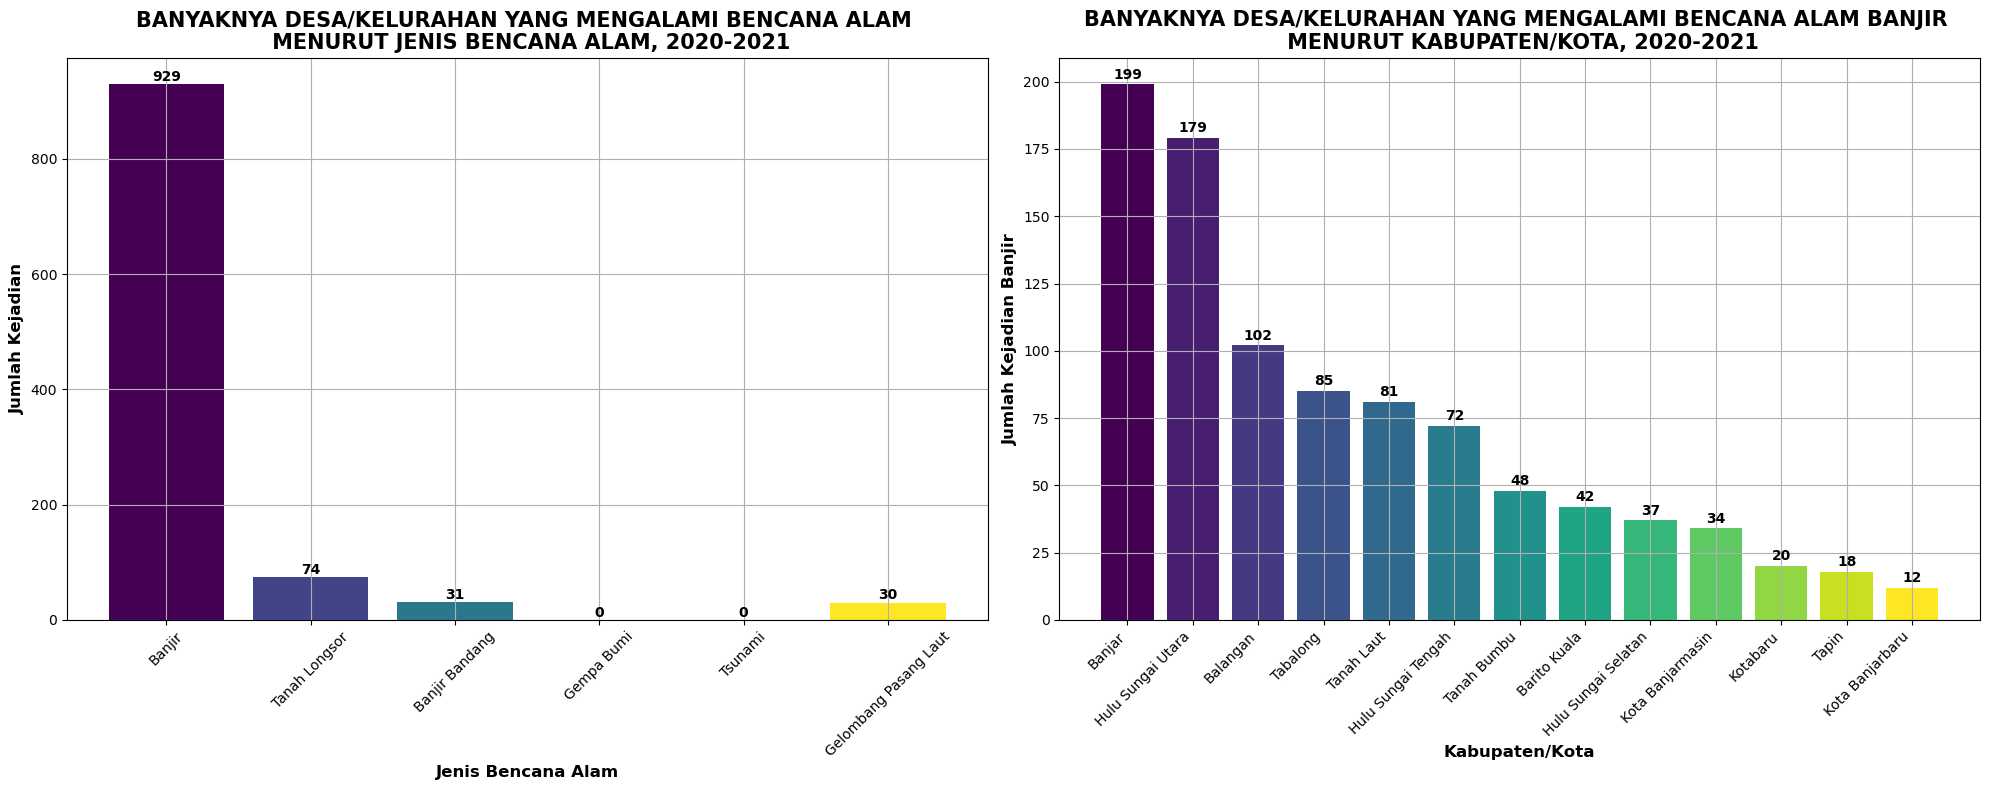

In [2]:
# DATA STATISTIK DESA
data_Statistik_Desa = pd.read_csv('LMSC014PY_Statistik Potensi Desa 2021_Sosial Budaya.csv')

# Assuming 'data_Statistik_Desa' is your DataFrame
row_kalsel = data_Statistik_Desa[data_Statistik_Desa['Kabupaten/Kota'] == 'Kalimantan Selatan']

# Prepare data for the first plot
disasters = ['Banjir', 'Tanah Longsor', 'Banjir Bandang', 'Gempa Bumi', 'Tsunami', 'Gelombang Pasang Laut']
counts = row_kalsel[disasters].values.flatten()
colors_disasters = plt.cm.viridis(np.linspace(0, 1, len(disasters)))

# Prepare data for the second plot
data_Statistik_Desa.drop(data_Statistik_Desa.tail(1).index,inplace=True)
data_Statistik_Desa = data_Statistik_Desa.sort_values(by='Banjir', ascending=False)
districts = data_Statistik_Desa['Kabupaten/Kota']
flood_counts = data_Statistik_Desa['Banjir']
colors_districts = plt.cm.viridis(np.linspace(0, 1, len(districts)))

# Create a figure to hold the subplots
plt.figure(figsize=(20, 8))

# Plot 1: Disasters
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
bars = plt.bar(disasters, counts, color=colors_disasters)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title('BANYAKNYA DESA/KELURAHAN YANG MENGALAMI BENCANA ALAM \n MENURUT JENIS BENCANA ALAM, 2020-2021', fontsize=15, fontweight='bold')
plt.xlabel('Jenis Bencana Alam', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Kejadian', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid()

# Plot 2: Flood occurrences by district
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
bars = plt.bar(districts, flood_counts, color=colors_districts)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title('BANYAKNYA DESA/KELURAHAN YANG MENGALAMI BENCANA ALAM BANJIR \n MENURUT KABUPATEN/KOTA, 2020-2021', fontsize=15, fontweight='bold')
plt.xlabel('Kabupaten/Kota', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Kejadian Banjir', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid()

# Show the figure with the subplots
plt.show()

# Tujuan Analisis
1. Mengidentifikasi dan memahami karakteristik banjir serta curah hujan di Provinsi Kalimantan Selatan.
2. Mengembangkan dan membandingkan berbagai model prediksi untuk menentukan model terbaik dalam memprediksi curah hujan sebagai strategi mitigasi banjir.
3. Memberikan rekomendasi berdasarkan hasil prediksi untuk mendukung pengambilan keputusan dalam upaya mitigasi banjir.

# Analisis

## Data
Penelitian ini menggunakan data curah hujan dalam satuan milimeter (mm) untuk Provinsi Kalimantan Selatan, yang tersedia dari tahun 2003 hingga 2017. Data ini diperoleh dari Badan Pusat Statistik (BPS) Kalimantan Selatan dan dapat diakses melalui tautan berikut: [BPS Kalimantan Selatan - Iklim](https://kalsel.bps.go.id/subject/151/iklim.html#subjekViewTab3).

Variabel dalam data ini meliputi:
* Bulan: Keterangan bulan saat data curah hujan diambil (Januari-Desember).
* Tahun: Keterangan tahun saat data curah hujan diambil (2003-2017).
* Curah Hujan (mm): Ukuran curah hujan di Provinsi Kalimantan Selatan dalam satuan milimeter (mm).

In [3]:
# Membaca Data
data = pd.read_csv('LMSC014PY_Curah Hujan 2003_2017_Sosial Budaya.csv')
data.head()

,Tahun,Bulan,Curah_Hujan
0,2003,Januari,395.2
1,2003,Februari,547.5
2,2003,Maret,150.0
3,2003,April,197.1
4,2003,Mei,50.3


In [4]:
data_ts = data[['Curah_Hujan']]
data_ts.head()
# Menambahkan Kolom Tanggal yang disesuaikan dengan data
data_ts['date'] = pd.date_range(start='1/1/2003', periods=len(data_ts), freq='M')

C:\Users\Mahendra\AppData\Local\Temp\ipykernel_16388\4233127889.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ts['date'] = pd.date_range(start='1/1/2003', periods=len(data_ts), freq='M')


## EDA

### Summary Data

In [5]:
data_ts.describe()

,Curah_Hujan,date
count,179.000000,180
mean,231.321788,2010-07-16 00:40:00
min,0.000000,2003-01-31 00:00:00
25%,109.800000,2006-10-23 06:00:00
50%,223.700000,2010-07-15 12:00:00
75%,319.850000,2014-04-07 12:00:00
max,1641.900000,2017-12-31 00:00:00
std,179.691873,NaN


Selama periode pengamatan dari tahun 2003 hingga 2017, data curah hujan di Provinsi Kalimantan Selatan menunjukkan variasi yang signifikan. Rata-rata curah hujan tercatat sebesar 231.32 mm, dengan rentang dari 0 mm hingga 1641.9 mm, yang mencerminkan variasi curah hujan yang luas. Pengamatan dilakukan pada 179 titik waktu yang berbeda, dengan nilai median curah hujan sebesar 223.70 mm. Distribusi waktu pengamatan tersebar dari awal tahun 2003 hingga akhir tahun 2017, dengan median tanggal pengamatan sekitar pertengahan tahun 2010. Standar deviasi curah hujan sebesar 179.69 mm menunjukkan adanya fluktuasi yang cukup besar dalam data curah hujan di wilayah ini, menandakan bahwa meskipun rata-rata curah hujan cukup tinggi, terdapat periode dengan curah hujan ekstrem yang sangat rendah maupun sangat tinggi.

In [6]:
print(data_ts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Curah_Hujan  179 non-null    float64       
 1   date         180 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.9 KB
None


Dari hasil pemeriksaan struktur DataFrame, dapat dilihat bahwa terdapat 180 baris data dengan 2 kolom, yaitu Curah_Hujan dan date. Tipe data pada kolom Curah_Hujan adalah float64, yang sesuai untuk merepresentasikan data curah hujan dalam bentuk numerik. Kolom date memiliki tipe data datetime64[ns], yang tepat untuk menyimpan informasi tanggal.

Pemeriksaan lebih lanjut menunjukkan bahwa kolom Curah_Hujan memiliki 179 nilai non-null dari total 180 entri, mengindikasikan adanya 1 nilai yang hilang (missing value) pada kolom tersebut. Kolom date tidak memiliki missing value dan lengkap dengan 180 entri.


In [7]:
print(data_ts[data_ts.isnull().any(axis=1)])

     Curah_Hujan       date
152          NaN 2015-09-30


Dari hasil pengecekan menggunakan kode di atas, ditemukan bahwa terdapat satu missing value pada data curah hujan (kolom Curah_Hujan). Berdasarkan hasil pengecekan, missing value ini berada pada tanggal 30 September 2015.

### Histogram curah hujan sepanjang Tahun

Text(0, 0.5, 'Density')

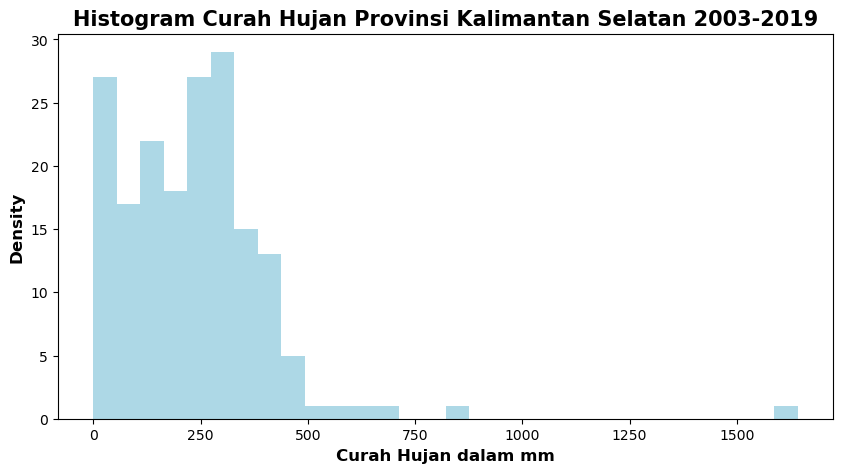

In [8]:
# Histogram
plt.figure(figsize=(10, 5))
plt.hist(data_ts['Curah_Hujan'], bins=30, color='lightblue')
plt.title('Histogram Curah Hujan Provinsi Kalimantan Selatan 2003-2019', fontsize=15, fontweight='bold')
plt.xlabel('Curah Hujan dalam mm', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')

Melalui histogram yang dibuat, terlihat bahwa sebagian besar curah hujan di Provinsi Kalimantan Selatan tersebar pada rentang 0-500 mm. Histogram menunjukkan bahwa sebagian besar data curah hujan berada dalam kategori menengah hingga tinggi, sesuai dengan [klasifikasi curah hujan BMKG](https://kalteng.bmkg.go.id/analisis/?info=curah%20hujan%20bulanan&&kat=analisis):

* Rendah (0–100 mm): Curah hujan dalam rentang ini menunjukkan kondisi yang relatif kering dan kurang sering terjadi dibandingkan kategori lainnya.
* Menengah (100–300 mm): Mayoritas data curah hujan berada dalam rentang ini, menunjukkan bahwa wilayah ini sering mengalami curah hujan yang cukup.
* Tinggi (300–500 mm): Curah hujan dalam kategori ini juga cukup umum terjadi, menunjukkan periode dengan intensitas hujan yang signifikan.
* Sangat Tinggi (>500 mm): Data curah hujan dalam kategori ini lebih jarang terjadi, namun tetap ada, termasuk beberapa outlier ekstrem dengan curah hujan lebih dari 1500 mm.

Terdapat indikasi adanya outlier dalam data curah hujan, yaitu nilai-nilai ekstrem yang melebihi 1500 mm. 

### Plot Time Series

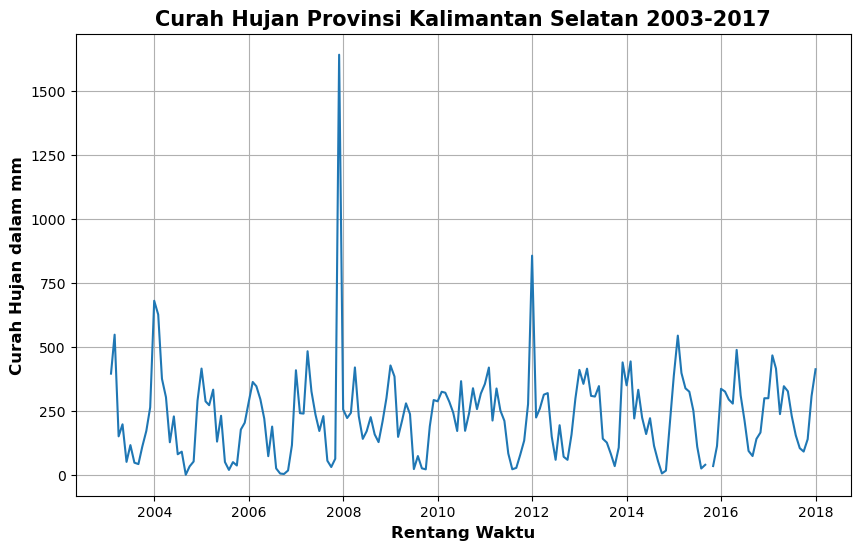

In [9]:
# Plot Time Series Curah Hujan
plt.figure(figsize=(10,6))
plt.plot(data_ts['date'], data_ts['Curah_Hujan'])
plt.title('Curah Hujan Provinsi Kalimantan Selatan 2003-2017', fontsize=15, fontweight='bold')
plt.ylabel('Curah Hujan dalam mm', fontsize=12, fontweight='bold')
plt.xlabel('Rentang Waktu', fontsize=12, fontweight='bold')
plt.grid(True)
plt.show()

Berdasarkan plot time series yang menggambarkan curah hujan di Provinsi Kalimantan Selatan dari tahun 2003 hingga 2017, dapat ditinjau beberapa pola dan tren penting sebagai berikut:

1. **Pola Musiman yang Konsisten**: Sepanjang periode pengamatan, curah hujan menunjukkan pola musiman yang relatif konsisten. Fluktuasi curah hujan yang terjadi secara periodik mengindikasikan adanya pola yang berulang setiap tahunnya. 

2. **Lonjakan pada Akhir Tahun 2007**: Terlihat adanya lonjakan  curah hujan yang mencolok pada akhir tahun 2007. Lonjakan ini menandakan adanya kejadian curah hujan ekstrem yang jauh lebih tinggi dibandingkan dengan periode lainnya dalam dataset. Ini menunjukkan adanya kemungkinan outlier yang signifikan, yang dapat disebabkan oleh fenomena cuaca ekstrem seperti badai, namun juga dapat terjadi karena kesalahan input data.

3. **Tidak Ada Efek Aditif yang Signifikan**: Dari visualisasi data, tidak terlihat adanya efek aditif yang signifikan dalam pola curah hujan. Pola fluktuasi yang diamati lebih mencerminkan variasi musiman daripada tren jangka panjang yang terus meningkat atau menurun.

### Boxplot Curah Hujan Tahunan 

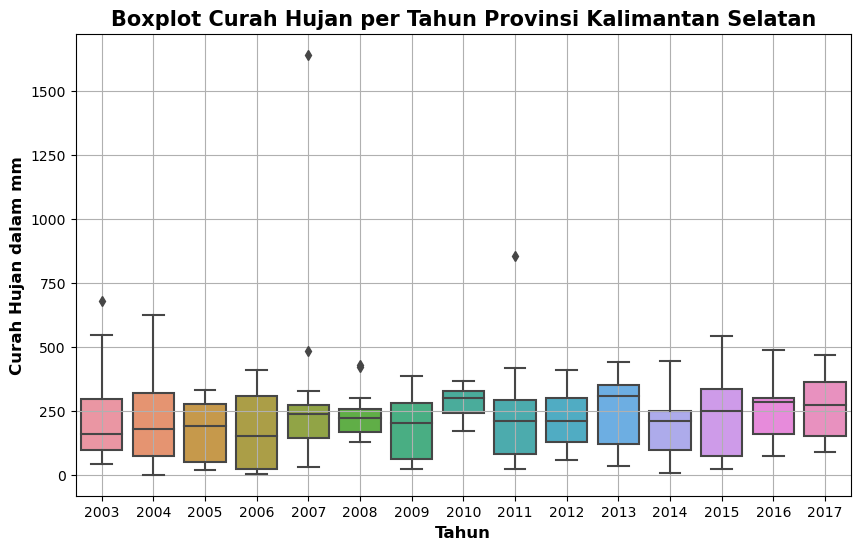

In [10]:
# Boxplot Curah Hujan per Tahun Provinsi Kalimantan Selatan
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tahun', y='Curah_Hujan', data=data)
plt.title('Boxplot Curah Hujan per Tahun Provinsi Kalimantan Selatan', fontsize=15, fontweight='bold')
plt.xlabel('Tahun', fontsize=12, fontweight='bold')
plt.ylabel('Curah Hujan dalam mm', fontsize=12, fontweight='bold')
plt.grid(True)

Boxplot di atas menunjukkan sebaran data curah hujan per tahun di Provinsi Kalimantan Selatan memberikan gambaran yang jelas mengenai distribusi dan variasi curah hujan selama periode pengamatan dari tahun 2003 hingga 2017. Melalui visualisasi tersebut dapat digambarkan :

1. **Sebaran Data yang Konsisten**: Dari boxplot, dapat dilihat bahwa sebaran curah hujan tiap tahunnya memiliki kemiripan yang signifikan, menunjukkan pola distribusi yang relatif konsisten. Ini mengindikasikan bahwa meskipun terdapat fluktuasi dari tahun ke tahun, karakteristik umum curah hujan di wilayah ini tetap stabil.

2. **Outlier**: Terdapat beberapa outlier dengan nilai curah hujan yang tidak biasa pada tahun 2003, 2007, 2008, dan 2011. Outlier ini menandakan kejadian curah hujan ekstrem yang tidak lazim dibandingkan dengan data lainnya dalam tahun-tahun tersebut. Outlier terbesar terjadi pada tahun 2007, dengan curah hujan yang melebihi 1500 mm

3. **Pola Umum**: Secara keseluruhan, pola sebaran curah hujan menunjukkan bahwa median curah hujan tiap tahun berada dalam rentang yang serupa, dengan variasi data yang juga relatif serupa tiap tahunnya. Ini mengindikasikan bahwa wilayah ini memiliki musim hujan yang stabil dari tahun ke tahun.

## Pra-Pemrosesan Data
Tahap pra-pemrosesan data adalah langkah penting sebelum memulai pemodelan. Pada tahap ini, data yang telah dieksplorasi akan diperlakukan dengan berbagai metode untuk memastikan model belajar dengan data yang bersih, lengkap, dan relevan, sehingga menghasilkan prediksi yang akurat dan andal.

### Penanganan Pencilan (*Outlier*)
Penanganan *outlier* merupakan langkah penting dalam pra-pemrosesan data untuk memastikan model belajar dari data yang bersih dan akurat. Outlier yang terdeteksi pada tahap eksplorasi data akan ditangani dengan asumsi bahwa outlier tersebut merupakan hasil dari kesalahan input data atau kejadian ekstrem yang tidak mencerminkan pola umum. *Outlier* akan diganti menggunakan nilai median dari tahun terjadinya *outlier* tersebut. Pemilihan nilai median sebagai pengganti didasarkan pada analisis eksplorasi data sebelumnya yang menunjukkan bahwa median lebih tahan terhadap pengaruh nilai ekstrem dibandingkan dengan rata-rata.

In [11]:
# Mendeteksi Pencilan (Outliers)
outliers = data_ts[data_ts['Curah_Hujan'] > 1500]
print(outliers)

# mengganti index 58 dengan nilai median
median_curah_hujan_2007 = data_ts[data_ts['date'].dt.year == 2007]['Curah_Hujan'].median()
data_ts.loc[58, 'Curah_Hujan'] = median_curah_hujan_2007

    Curah_Hujan       date
58       1641.9 2007-11-30


### Penanganan Missing Value
Pada tahap eksplorasi data, baik melalui rangkuman data maupun plot time series, ditemukan adanya nilai yang hilang. Untuk memastikan data yang digunakan dalam pemodelan tetap akurat dan representatif, nilai yang hilang akan diimputasi dengan menggantinya menggunakan nilai median yang sesuai pada tahun yang sama.

Pemilihan nilai median sebagai pengganti didasarkan pada sifat median yang lebih tahan terhadap *outlier* dibandingkan rata-rata, sehingga memberikan nilai pengganti yang lebih representatif dari distribusi data asli.

In [12]:
# Menemukan data yang hilang
data_ts[data_ts['Curah_Hujan'].isnull()]

,Curah_Hujan,date
152,NaN,2015-09-30


In [13]:
# Menghitung Median Curah Hujan Tahun 2007
median_curah_hujan_2015 = data_ts[data_ts['date'].dt.year == 2015]['Curah_Hujan'].median()
print(median_curah_hujan_2015)

# Mengisi data yang hilang dengan median pada index 152
data_ts.loc[152, 'Curah_Hujan'] = median_curah_hujan_2015

250.9


### Train Test Split
Dataset akan dibagi menjadi train dan test set, data dari tahun 2003 hingga 2016 sebagai data train, dan data dari tahun 2017 sebagai data test

In [14]:
# Membuat data train dan test dengan 
train = data_ts[data_ts['date'].dt.year < 2017]
test = data_ts[data_ts['date'].dt.year >= 2017]

# date sebagai index
train = train.set_index('date')
test = test.set_index('date')

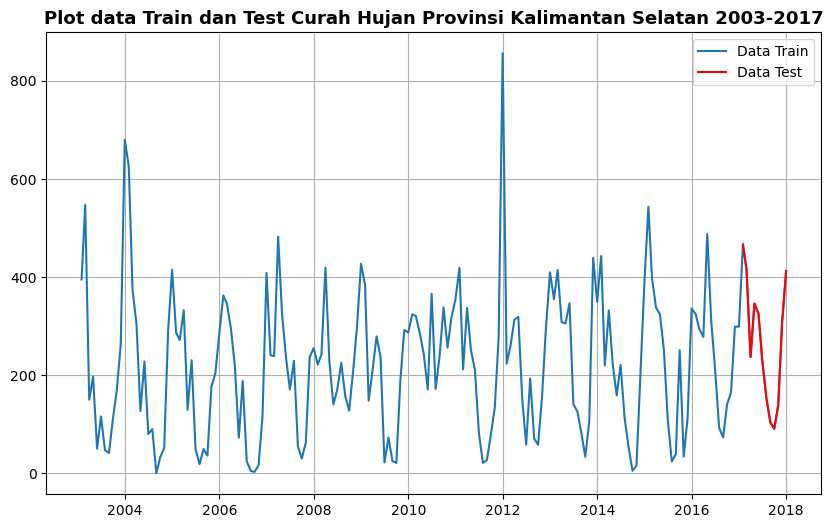

In [15]:
# Plot Time Series Data Train dan Test
plt.figure(figsize=(10,6))
plt.plot(data_ts['date'], data_ts['Curah_Hujan'])
plt.plot(test.index, test['Curah_Hujan'], color='red')
plt.legend(['Data Train', 'Data Test'])
plt.title('Plot data Train dan Test Curah Hujan Provinsi Kalimantan Selatan 2003-2017', fontsize=13, fontweight='bold')
plt.grid(True)
plt.show()

## Modelling

### Uji Stasioneritas
Data deret waktu yang stasioner adalah data yang memiliki nilai rata-rata yang konstan sepanjang waktu. Deret waktu yang stasioner biasanya menghasilkan kinerja model yang lebih baik karena keteguhan (*robust*) sifat statistik utamanya memastikan bahwa model dapat menangkap dinamika yang mendasarinya dengan lebih baik, sehingga menghasilkan prediksi yang lebih akurat.

Terdapat beberapa metode untuk menguji stasioneritas, di antaranya adalah **uji akar** unit (***Unit Root Test***) dengan ***Augmented Dickey-Fuller Test*** dan **teknik grafik** [(Yanti, 2009)](https://ejournal.unisba.ac.id/index.php/statistika/article/view/989). Dalam penelitian ini, digunakan teknik grafik dengan melihat karakteristik plot Autocorrelation Function (ACF).

Jika dari plot ACF terlihat bahwa nilai autokorelasi menurun secara lamban, maka dapat dikatakan data tersebut tidak stasioner. Sebaliknya, jika plot ACF menunjukkan penurunan autokorelasi secara cepat, maka data dapat dikatakan stasioner. Selain itu, dari plot ACF juga dapat ditinjau adanya efek musiman atau tidak. Efek musiman terlihat dari pola berulang dalam plot ACF.

Dengan menggunakan teknik grafik untuk uji stasioneritas, kita dapat dengan mudah mengidentifikasi apakah data deret waktu memiliki sifat stasioner atau tidak, serta mengidentifikasi adanya pola musiman yang dapat mempengaruhi model prediksi. Hal ini penting untuk memastikan bahwa model yang dibangun dapat memberikan prediksi yang lebih akurat dan andal.

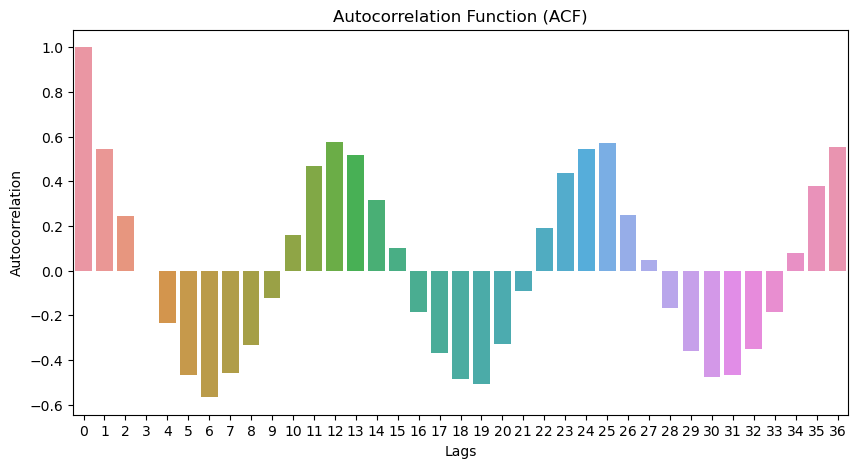

In [16]:
# Plot ACF
def plot_acf(series, lags):
    acf_vals = [series.autocorr(lag) for lag in range(lags + 1)]
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(range(lags + 1)), y=acf_vals)
    plt.title('Autocorrelation Function (ACF)')
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.show()

plot_acf(train['Curah_Hujan'], lags=36)


Berdasarkan plot ACF, terlihat bahwa data menunjukkan pola yang menurun secara cepat dan eksponensial, yang mengindikasikan bahwa data tersebut stasioner dalam rataannya. Penurunan yang cepat pada plot ACF menunjukkan bahwa korelasi antar pengamatan menurun dengan cepat, menunjukkan sifat stasioner dari data ini.

Selain itu, dari plot ACF juga terlihat adanya pola berulang yang menunjukkan adanya indikasi musiman dalam data. Pola musiman ini dapat dengan jelas terlihat dengan adanya 12 lag pada setiap musimnya dalam plot ACF di atas. Hal ini menandakan bahwa terdapat pengulangan pola korelasi setiap 12 periode, yang konsisten dengan adanya efek musiman dalam data curah hujan di Provinsi Kalimantan Selatan.

### Plot Time Series

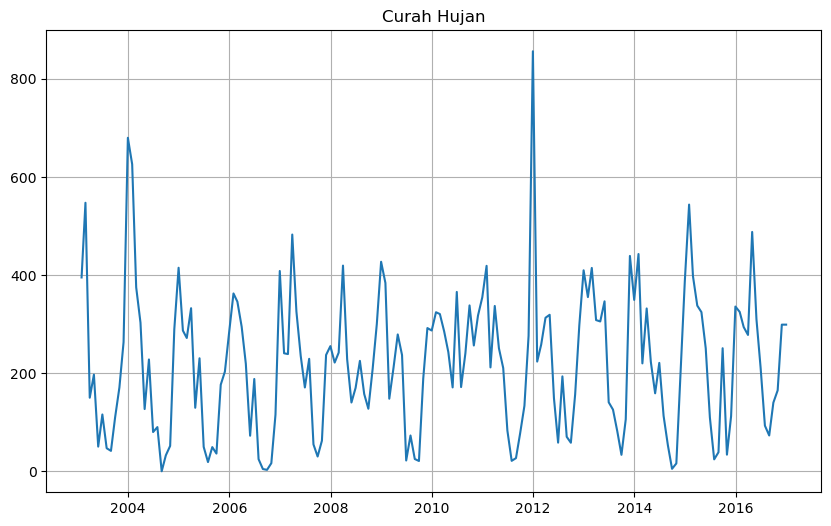

In [17]:
# Plot Time Series
plt.figure(figsize=(10,6))
plt.plot(train.index, train['Curah_Hujan'])
plt.title('Curah Hujan')
plt.grid(True)
plt.show()

Dari plot data time series di atas, dapat dilihat bahwa data tidak memiliki trend dan terdapat pola musiman. 


### Metriks Evaluasi : RMSE
***Root mean square error*** (**RMSE**) adalah deviasi standar residual, atau perbedaan rata-rata antara nilai yang diproyeksikan dan nilai aktual yang dihasilkan oleh model. Residual merupakan pemisahan antara titik data dan garis regresi.
Tingkat penyebaran residual ini diukur dengan RMSE, yang menunjukkan seberapa baik data aktual sesuai dengan prediksi model yang diberikan. Formula RMSE adalah :

$ RMSE = \sqrt{\sum_{i=1}^{n} \frac{(\hat{y_i}-y_i)^2} {n}}$

RMSE digunakan untuk mencari model terbaik dengan kriteria nilai RMSE paling rendah.

In [18]:
def hitung_rmse(actual, predicted):
    squared_diffs = (actual - predicted) ** 2
    
    mean_squared_diffs = np.mean(squared_diffs)
    
    root_mean_squared_error = np.sqrt(mean_squared_diffs)
    
    return root_mean_squared_error

### Klaifikasi Pegels

Pemulusan eksponensial dengan Klasifikasi Pegel’s dapat membantu menyelesaikan berbagai kemungkinan model yang akan ditemui ketika sedang melakukan peramalan. Metode ini memungkinan terdapat sembilan model peramalan dimana semuanya memiliki persamaan pemulusan eksponensial yang berbeda untuk setiap model. Pegels’s menciptakan pemulusan eksponensial dengan cara memisahkan antara aspek musiman dan aspek tren yang dapat dilihat pada gambar berikut:


![Klasifikasi Pegels](https://miro.medium.com/v2/resize:fit:828/format:webp/0*ush1syoyZ30nY7Jc)


Dari kesembilan model pemulusan eksponensial tersebut dapat diringkas dengan rumus:

$ St = \alpha P + (1-\alpha)Q $

dimana P dan Q berubah-ubah menurut aspek musiman dan tren dari data yaitu sebagai berikut:

![Persamaan Klasifikasi Pegels](https://miro.medium.com/v2/resize:fit:828/format:webp/1*SHCedmswbMJj8IjTCwELcw.png)

dengan :

$X_t$ = Data deret waktu

$S_t$ = Data yang dihaluskan

$A_t = \beta (S_t - S_{t-1} + (1-\beta)A_{t-1})$ (Trend Aditif)

$B_t = \gamma (S_t/S_{t-1}) + (1-\gamma)B_{t-1}$ (Trend Multiplikatif)

$C_t = \delta(X_t-S_t) + (1-\delta)C_{t-L}$ (Musiman Aditif)

$D_t = \theta (X_t/S_t)+(1- \theta)D_{t-L}$ (Musiman Multiplikatif)

$\alpha$, $\beta$, $\gamma$, $\theta $ Semuanya terlentak antara 0 dan 1

Dalam perhitungannya, diperlukan inisiasi yang dirumuskan dengan:

$ A_L = 1/L^2$ Jumlah Musiman kedua- jumlah Musiman pertama 

$B_1 =(X_2-X_1)$

$C_t = (X_t-S_L)$ $t = 1,...,L$

$D_t = (X_t/S_L)$, $t=1,...,L$

$S_L = (X_1+X_2+...+X_L)/L$ 

Pengecualian inisialisasi tipe $A_1$, $B_1$, $C_1$

$S_1 = X_1$

$A_1 = B_1 = X_2 - X_1$

Rumus untuk membuat prediksi m periode ke muka $(F_{t+m})$ dengan menggunakan klasifikasi Pegels ditunjukkan pada tabel di bawah ini.

![Persamaan Prediksi Klasifikasi Pegels](https://miro.medium.com/v2/resize:fit:828/format:webp/1*b-R91z8wfCyQZ5VmLbPVzw.png)



#### Identifikasi dan pemodelan Model Klasifikasi Pegels
Melalui hasil eksplorasi data dengan *plot acf* dan *plot time series* disimpulkan karakteristik yang cocok pada data adalah Tidak mmeiliki trend (***No Trend Effect***) dan efek aditif musiman ***(Additive Seasonal Effect)***. Selanjutnya Pemodelan Klasifikasi pegels akan menyesuaikan karakteristik tersebut.

In [19]:

def pegels_notren_additive_seasonal(data, L, alpha, delta):
    s_t = np.full(len(data), np.nan)  # Array kosong dengan panjang data
    c_t = np.full(len(data), np.nan)  # Array kosong dengan panjang data
    p = np.full(len(data), np.nan)     # Array kosong dengan panjang data
    q = np.full(len(data), np.nan)     # Array kosong dengan panjang data
    f_t = np.full(len(data), np.nan)   # Array kosong dengan panjang data
    error = np.full(len(data), np.nan) # Array kosong dengan panjang data
    m = 1  # Peramalan untuk 1 periode ke depan

    s_t[L-1] = np.mean(data[:L])  # Inisiasi s_t pada periode L (indeks L-1 karena indeks dimulai dari 0)
    c_t[:L] = data[:L] - s_t[L-1]  # Inisiasi c_t dari periode 1 sampai L
    p[L] = data[L] - c_t[L-L]  # Inisiasi p pada periode L+1 (indeks L karena indeks dimulai dari 0)
    q[L] = s_t[L-1]  # Inisiasi q pada periode L+1 (indeks L-1 karena indeks dimulai dari 0)
    s_t[L] = alpha * p[L] + (1 - alpha) * q[L]  # Nilai s_t pada periode L+1
    c_t[L] = delta * (data[L] - s_t[L]) + (1 - delta) * c_t[L-L]  # Nilai c_t pada periode L+1

    for i in range(L+1, len(data)):
        p[i] = data[i] - c_t[i-L]
        q[i] = s_t[i-1]
        s_t[i] = alpha * p[i] + (1 - alpha) * q[i]
        c_t[i] = delta * (data[i] - s_t[i]) + (1 - delta) * c_t[i-L]

    for i in range(L+1, len(data)-m+1):  #
        f_t[i+m-1] = s_t[i-1] + c_t[i-L]

    for i in range(L+1, len(data)):
        error[i] = (data[i] - f_t[i])**2

    df = pd.DataFrame({
        'Data': np.concatenate((data, np.full(len(data) - len(data), np.nan))),
        'St': np.concatenate((s_t, np.full(len(data) - len(s_t), np.nan))),
        'Ct': np.concatenate((c_t, np.full(len(data) - len(c_t), np.nan))),
        'P': np.concatenate((p, np.full(len(data) - len(p), np.nan))),
        'Q': np.concatenate((q, np.full(len(data) - len(q), np.nan))),
        'Forecast': np.concatenate((f_t, np.full(len(data) - len(f_t), np.nan))),
        'Error_Squared': np.concatenate((error, np.full(len(data) - len(error), np.nan)))
    },index=data.index)

    return df

In [20]:
# Menjalankan fungsi pegels_notren_additive_seasonal
result_df = pegels_notren_additive_seasonal(train['Curah_Hujan'], L=12, alpha=0.2, delta=0.2)
print(result_df)

# RMSE
rmse = np.sqrt(np.mean(result_df['Error_Squared'].dropna()))
print('RMSE:', rmse)

             Data          St          Ct           P           Q    Forecast  \
date                                                                            
2003-01-31  395.2         NaN  164.450000         NaN         NaN         NaN   
2003-02-28  547.5         NaN  316.750000         NaN         NaN         NaN   
2003-03-31  150.0         NaN  -80.750000         NaN         NaN         NaN   
2003-04-30  197.1         NaN  -33.650000         NaN         NaN         NaN   
2003-05-31   50.3         NaN -180.450000         NaN         NaN         NaN   
...           ...         ...         ...         ...         ...         ...   
2016-08-31   73.0  254.343740 -171.617794  242.186308  257.383098   88.196790   
2016-09-30  140.0  257.954219 -129.507754  272.396137  254.343740  121.947603   
2016-10-31  165.0  264.316656 -119.676452  289.766401  257.954219  133.187818   
2016-11-30  299.0  266.278369   26.444149  274.125221  264.316656  289.191435   
2016-12-31  299.0  230.80741

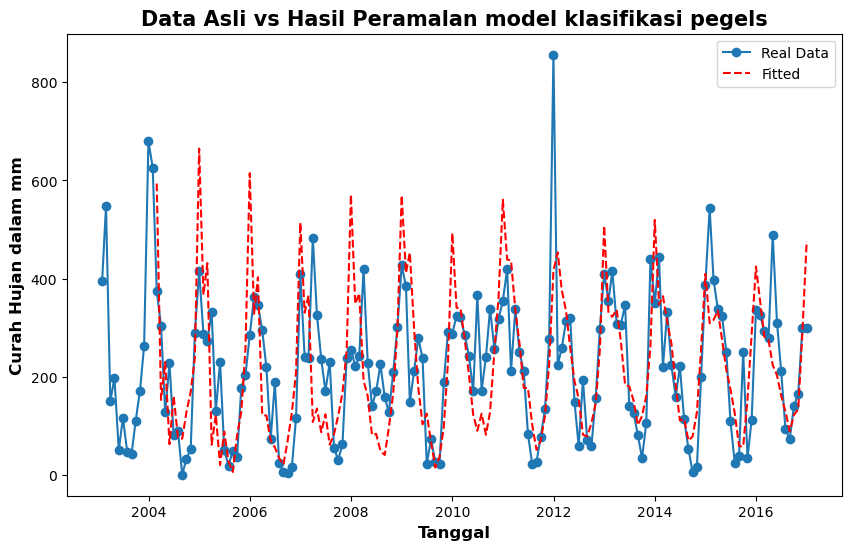

RMSE: 123.14390640748978


In [21]:
real_data = result_df['Data'].dropna()  
forecast = result_df['Forecast'].dropna()

plt.figure(figsize=(10, 6))
plt.plot(real_data.index, real_data, label='Real Data', marker='o')
plt.plot(forecast.index, forecast, label='Fitted', linestyle='--', color='red')
plt.title('Data Asli vs Hasil Peramalan model klasifikasi pegels', fontsize=15, fontweight='bold')
plt.xlabel('Tanggal', fontsize=12, fontweight='bold')
plt.ylabel('Curah Hujan dalam mm', fontsize=12, fontweight='bold')
plt.legend()
plt.show()

print('RMSE:', rmse)

#### Mencari Parameter terbaik Klasifikasi Pegels

In [22]:
# Membuat kombinasi unik alpha dan beta
alpha_values = np.arange(0.1, 1, 0.1)
beta_values = np.arange(0.1, 1, 0.1)
alpha, beta = np.meshgrid(alpha_values, beta_values)
alpha = alpha.flatten()
beta = beta.flatten()

RMSE = []

# Looping sebanyak kombinasi alpha dan beta
for i in range(len(alpha)):
    param = pegels_notren_additive_seasonal(train['Curah_Hujan'], 12, alpha[i], beta[i])
    RMSE.append(np.sqrt(np.nanmean(param['Error_Squared'])))

Tabel_RMSE_Pegels = pd.DataFrame({'Alpha': alpha, 'Beta': beta, 'RMSE': RMSE})

print(Tabel_RMSE_Pegels.head())
print(Tabel_RMSE_Pegels.tail())

# Mencari Parameter yang meminimumkan RMSE
Min_RMSE = Tabel_RMSE_Pegels.loc[Tabel_RMSE_Pegels['RMSE'].idxmin()]

print("Parameter dengan nilai RMSE minimum:") 
print(Min_RMSE)

   Alpha  Beta        RMSE
0    0.1   0.1  129.735002
1    0.2   0.1  135.132496
2    0.3   0.1  140.330772
3    0.4   0.1  145.610332
4    0.5   0.1  151.362304
    Alpha  Beta        RMSE
76    0.5   0.9  137.806476
77    0.6   0.9  136.789655
78    0.7   0.9  137.688691
79    0.8   0.9  142.453890
80    0.9   0.9  155.582893
Parameter dengan nilai RMSE minimum:
Alpha      0.10000
Beta       0.40000
RMSE     115.16202
Name: 27, dtype: float64


Didapatkan parameter terbaik pada metode Klasifikasi Pegels adalah nilai **Alpha** sebesar **0,1** dan **Beta** sebesar **0,4** yang menghasilkan RMSE sebesar 115,16202.

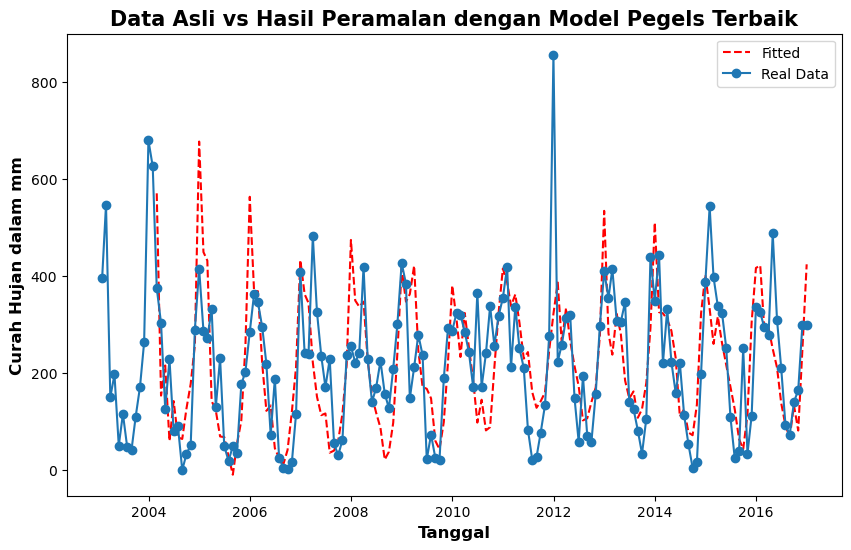

RMSE: 115.16201964948094


In [23]:
# Model terbaik dan hasil peramalan
best = pegels_notren_additive_seasonal(train['Curah_Hujan'], 12, 0.1, 0.4)
forecast = best['Forecast'].dropna()
plt.figure(figsize=(10, 6))
plt.plot(forecast.index, forecast, label='Fitted', linestyle='--', color='red')
plt.plot(real_data.index, real_data, label='Real Data', marker='o')
plt.title('Data Asli vs Hasil Peramalan dengan Model Pegels Terbaik', fontsize=15, fontweight='bold')
plt.xlabel('Tanggal', fontsize=12, fontweight='bold')
plt.ylabel('Curah Hujan dalam mm', fontsize=12, fontweight='bold')
plt.legend()
plt.show()

# RMSE
rmse_train_pegels = np.sqrt(np.mean(best['Error_Squared'].dropna()))
print('RMSE:', rmse_train_pegels)

In [24]:
best.tail()

,Data,St,Ct,P,Q,Forecast,Error_Squared
date,,,,,,,
2016-08-31,73.0,240.388700,-170.185128,245.049413,239.870843,67.821431,26.817580
2016-09-30,140.0,241.005195,-104.334266,246.553647,240.388700,133.835053,38.006568
2016-10-31,165.0,249.355326,-129.446033,324.506504,241.005195,81.498691,6972.468564
2016-11-30,299.0,254.471751,16.899552,300.519579,249.355326,247.835746,2617.780839
2016-12-31,299.0,241.949748,124.669068,129.251722,254.471751,424.220029,15680.055743


#### Forecasting data test

In [25]:

def pegels_notren_additive_seasonal_predict(data, L, alpha, delta):
    s_t = np.full(len(data), np.nan)  # Array kosong dengan panjang data
    c_t = np.full(len(data), np.nan)  # Array kosong dengan panjang data
    p = np.full(len(data), np.nan)     # Array kosong dengan panjang data
    q = np.full(len(data), np.nan)     # Array kosong dengan panjang data
    f_t = np.full(len(data), np.nan)   # Array kosong dengan panjang data
    error = np.full(len(data), np.nan) # Array kosong dengan panjang data
    m = 12  # Peramalan untuk 1 periode ke depan

    s_t[L-1] = np.mean(data[:L])  # Inisiasi s_t pada periode L (indeks L-1 karena indeks dimulai dari 0)
    c_t[:L] = data[:L] - s_t[L-1]  # Inisiasi c_t dari periode 1 sampai L
    p[L] = data[L] - c_t[L-L]  # Inisiasi p pada periode L+1 (indeks L karena indeks dimulai dari 0)
    q[L] = s_t[L-1]  # Inisiasi q pada periode L+1 (indeks L-1 karena indeks dimulai dari 0)
    s_t[L] = alpha * p[L] + (1 - alpha) * q[L]  # Nilai s_t pada periode L+1
    c_t[L] = delta * (data[L] - s_t[L]) + (1 - delta) * c_t[L-L]  # Nilai c_t pada periode L+1

    for i in range(L+1, len(data)):
        p[i] = data[i] - c_t[i-L]
        q[i] = s_t[i-1]
        s_t[i] = alpha * p[i] + (1 - alpha) * q[i]
        c_t[i] = delta * (data[i] - s_t[i]) + (1 - delta) * c_t[i-L]

    for i in range(L+1, len(data)-m+1): 
        f_t[i+m-1] = s_t[i-1] + c_t[i-L]

    for i in range(L+1, len(data)):
        error[i] = (data[i] - f_t[i])**2

    df = pd.DataFrame({
        'Data': np.concatenate((data, np.full(len(data) - len(data), np.nan))),
        'St': np.concatenate((s_t, np.full(len(data) - len(s_t), np.nan))),
        'Ct': np.concatenate((c_t, np.full(len(data) - len(c_t), np.nan))),
        'P': np.concatenate((p, np.full(len(data) - len(p), np.nan))),
        'Q': np.concatenate((q, np.full(len(data) - len(q), np.nan))),
        'Forecast': np.concatenate((f_t, np.full(len(data) - len(f_t), np.nan))),
        'Error_Squared': np.concatenate((error, np.full(len(data) - len(error), np.nan)))
    })

    return df

In [26]:
# Model terbaik dan hasil peramalan
best_predict = pegels_notren_additive_seasonal_predict(train['Curah_Hujan'], 12, 0.1, 0.4)
best_predict_oov = best_predict[['Forecast']].tail(12).set_index(test.index)
best_predict_oov

,Forecast
date,
2017-01-31,260.143463
2017-02-28,316.615426
2017-03-31,262.268719
2017-04-30,216.003833
2017-05-31,171.607971
2017-06-30,125.374304
2017-07-31,64.020098
2017-08-31,43.110342
2017-09-30,114.901137


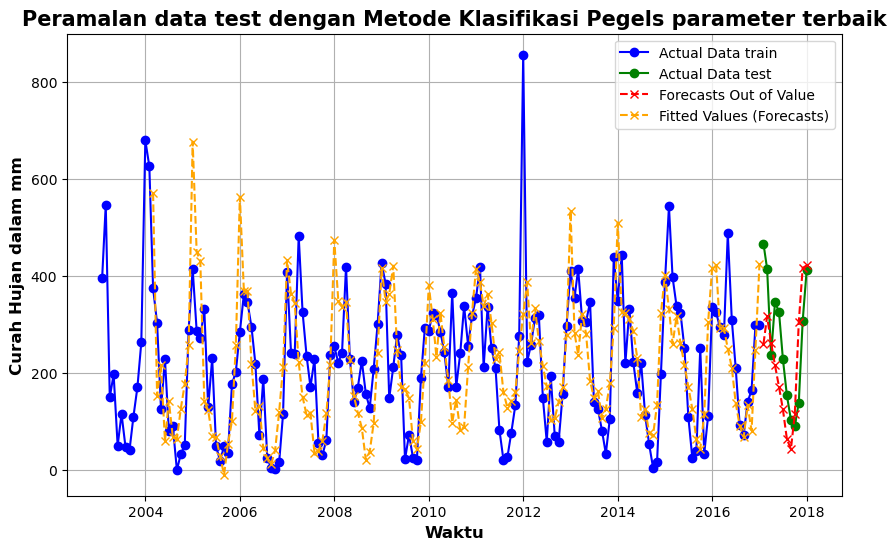

In [27]:
# Plot peramalan data test
plt.figure(figsize=(10, 6))
plt.plot(train.index,train, label='Actual Data train', marker='o', color='blue')  
plt.plot(test.index,test, label='Actual Data test', marker='o',color='green') 
plt.plot(best_predict_oov.index, best_predict_oov, label='Forecasts Out of Value', linestyle='--', marker='x',color='red')
plt.plot(best.index, best[['Forecast']], label='Fitted Values (Forecasts)', linestyle='--', marker='x',color='orange') 
plt.title('Peramalan data test dengan Metode Klasifikasi Pegels parameter terbaik', fontsize=15, fontweight='bold')
plt.xlabel('Waktu', fontsize=12, fontweight='bold')
plt.ylabel('Curah Hujan dalam mm', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
rmse_test_pegels = hitung_rmse(test['Curah_Hujan'], best_predict_oov['Forecast'])
print('RMSE Test:', rmse_test_pegels)

RMSE Test: 114.24304676632822


Menggunakan model Klasifikasi pegels dengan parameter terbaik (alpha = 0.1, delta =  0.4), didapatkan RMSE pada data test yaitu sebesar 114,24. Pada grafik juga terlihat bahwa hasil peramalan cukup baik menangkap pola pada data *test*.

### Triple Exponential Smoothing

Metode Winter, atau sering disebut sebagai metode Triple Exponential Smoothing,
adalah sebuah pendekatan yang dikembangkan oleh R.W. Winter yang memperluas model
peramalan eksponensial dengan memasukkan tiga komponen utama, yaitu stasioner, tren, dan musiman.
* Pemulusan untuk Komponen Stasioner. Komponen stasioner dari sebuah seri waktu
adalah bagian dari data yang tidak menunjukkan pola tren atau musiman yang konsisten. Dalam metode Winter, proses pemulusan untuk komponen stasioner dilakukan dengan menggunakan eksponensial smoothing untuk memberikan bobot yang lebih tinggi pada data yang lebih baru.

*  Pemulusan untuk Komponen Tren. Komponen tren menggambarkan pola peningkatan atau
penurunan secara keseluruhan dari waktu ke waktu. Metode Winter menggunakan eksponensial smoothing untuk meramalkan dan mengekstrapolasi tren di masa depan.

* Pemulusan untuk Komponen Musiman. Komponen musiman mengacu pada pola yang
berulang secara periodik dalam data, seperti pola penjualan yang meningkat selama musim
liburan atau musim tertentu dalam setahun. Metode Winter memasukkan faktor musiman ke
dalam model dengan memperhitungkan pola musiman sebelumnya dan menyesuaikannya
dengan data aktual.


Metode Winter dapat disesuaikan dengan karakterteristik data time series Multiplikatif dan Aditif.

Pada penelitian ini akan dijelaskan spesifik Winter Aditif menyesuaikan kaakteristik data curah hujan Kalimantan Selatan.


Metode Winter Aditif cocok untuk melakukan peramalan data time series di mana
amplitude (ketinggian) pola musimannya tidak bergantung pada rata-rata level atau
tingkatan dari deret data (Montgomery, Johnson & Gardiner, 1990, p146) sehingga
bersifat konstan. Dengan kata lain, metode ini baik digunakan untuk data aditif.
Persamaan dasar metode Winter Aditif yaitu,
* **Pemulusan Keseluruhan**

$ S_t = \alpha X_t/I_{t-L} + (1-\alpha)(S_{t-1} + b_{t-1})$

di mana $t \in  {L+1,..,j}$

* **Pemulusan Tren**
$ b_t = \gamma (S_t-S_{t-1}) + (1-\gamma)b_{t-1} $

* **Pemulusan Musiman**
$I_t = \beta X_t/S_t + (1-\beta) I_{t-L}$

* **Peramalan (Forecast)**
$F_{t+m} = (S_t + B_{t,m})I_{t-L+m}$

dengan inisialisasi

* $S_L = \frac{X_1+X_2+...+X_L}{L}$

* $b_L = \frac{1}{L} (\frac{X_{L+1}-X_1}{L}+ \frac{X_{L+2}-X_2}{L}+...+\frac{X_{L+L}-X_L}{L}) $

$b_L = \frac{1}{L^2}$ (Jumlah data musiman 2 - jumlah data musiman 1)

* $I_1 = \frac{X_1}{S_L}, I_2 = \frac{X_2}{S_L}$, dst

**Keterangan:**
* $L$ = panjang musiman
* $b$ = komponen tren
* $I$ = faktor penyesuaian musiman
* $F_{t+m}$ = ramalan $m$ periode ke depan


In [29]:
# Triple SES
def triple_exponential_smoothing(data, seasonal_periods, alpha, beta, gamma):
    n = len(data)
    forecasts = np.zeros(n)
    level = data[0]
    trend = np.mean(np.diff(data[:seasonal_periods]))
    seasonal = data[:seasonal_periods] - level
    
    for i in range(n):
        if i >= seasonal_periods:
            last_level, level = level, alpha*(data[i] - seasonal[i%seasonal_periods]) + (1-alpha)*(level + trend)
            trend = beta*(level - last_level) + (1-beta)*trend
            seasonal[i%seasonal_periods] = gamma*(data[i] - level) + (1-gamma)*seasonal[i%seasonal_periods]
        forecasts[i] = level + trend + seasonal[i%seasonal_periods]
    
    return forecasts

seasonal_periods = 12 
beta = 0.2
gamma = 0.2
alpha = 0.1

forecasts = triple_exponential_smoothing(train['Curah_Hujan'], seasonal_periods, alpha, beta, gamma)

forecast_df = pd.DataFrame({
    'Forecast': forecasts
}, index=train.index)  
print(forecast_df.head())

              Forecast
date                  
2003-01-31  421.090909
2003-02-28  573.390909
2003-03-31  175.890909
2003-04-30  222.990909
2003-05-31   76.190909


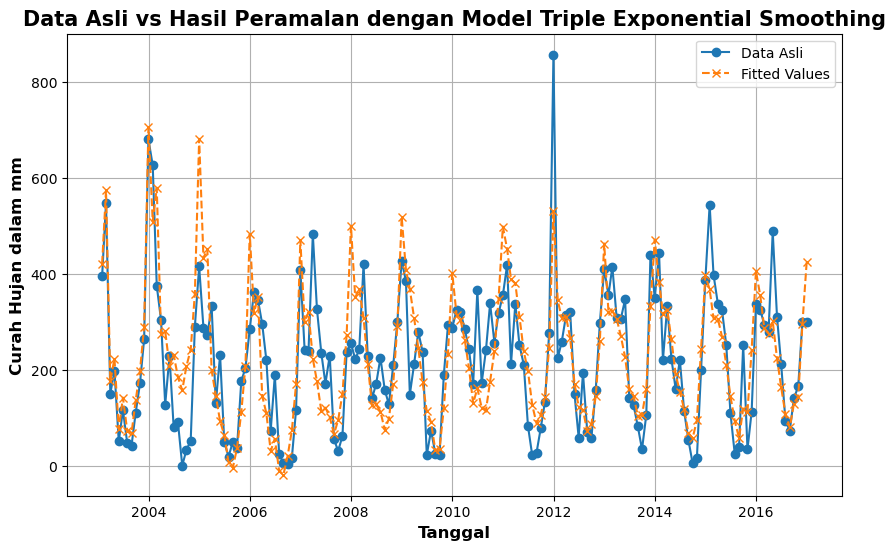

RMSE: 92.68207415088415


In [30]:
# Plot Data Asli vs Hasil Peramalan
plt.figure(figsize=(10, 6))
plt.plot(train.index,train, label='Data Asli', marker='o')
plt.plot(forecast_df.index,forecast_df, label='Fitted Values', linestyle='--', marker='x')
plt.title('Data Asli vs Hasil Peramalan dengan Model Triple Exponential Smoothing', fontsize=15, fontweight='bold')
plt.xlabel('Tanggal', fontsize=12, fontweight='bold')
plt.ylabel('Curah Hujan dalam mm', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

print('RMSE:', hitung_rmse(train['Curah_Hujan'], forecast_df['Forecast']))

#### Mencari Parameter terbaik

In [31]:
def find_best_parameters(data, seasonal_periods):
    parameter_values = np.arange(0.1, 1.0, 0.1)
    
    best_rmse = float("inf")
    best_parameters = None
    
    for alpha in parameter_values:
        for beta in parameter_values:
            for gamma in parameter_values:
                forecasts = triple_exponential_smoothing(data, seasonal_periods, alpha, beta, gamma)

                current_rmse = hitung_rmse(data[seasonal_periods:], forecasts[seasonal_periods:])
                
                if current_rmse < best_rmse:
                    best_rmse = current_rmse
                    best_parameters = (alpha, beta, gamma)
    
    return best_parameters, best_rmse

seasonal_periods = 12 
best_parameters, best_rmse = find_best_parameters(train['Curah_Hujan'], seasonal_periods)

print("Best Parameters (alpha, beta, gamma):", best_parameters)
print("Best RMSE:", best_rmse)

Best Parameters (alpha, beta, gamma): (0.7000000000000001, 0.1, 0.9)
Best RMSE: 11.266484141978951


In [32]:
forecasts = triple_exponential_smoothing(train['Curah_Hujan'], seasonal_periods, 0.7000000000000001, 0.1, 0.9)
forecast_df = pd.DataFrame({'Forecast': forecasts }, index=train.index)
forecast_df.head()

,Forecast
date,
2003-01-31,421.090909
2003-02-28,573.390909
2003-03-31,175.890909
2003-04-30,222.990909
2003-05-31,76.190909


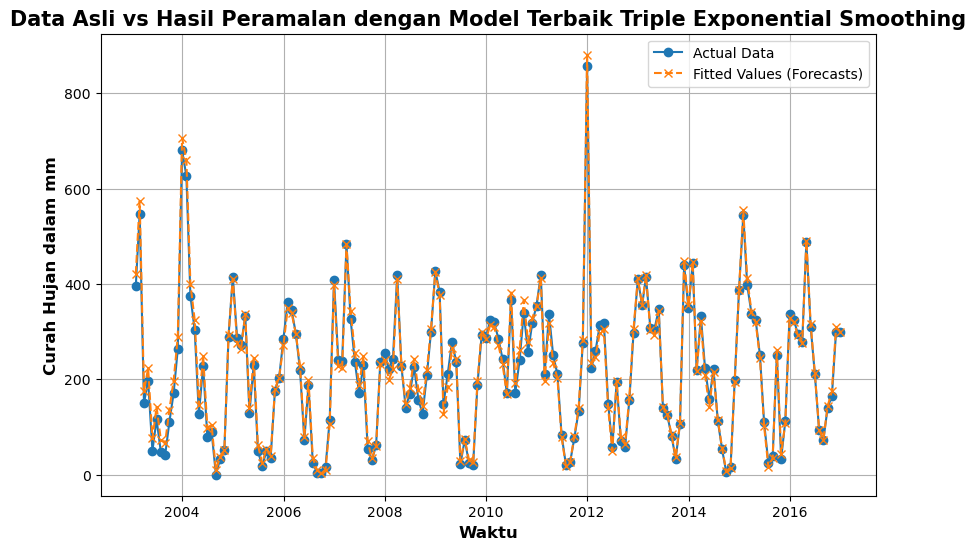

RMSE: 11.266484141978951


In [33]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(train.index,train, label='Actual Data', marker='o')
plt.plot(forecast_df.index,forecast_df, label='Fitted Values (Forecasts)', linestyle='--', marker='x')
plt.title('Data Asli vs Hasil Peramalan dengan Model Terbaik Triple Exponential Smoothing', fontsize=15, fontweight='bold')
plt.xlabel('Waktu', fontsize=12, fontweight='bold')
plt.ylabel('Curah Hujan dalam mm', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()


print('RMSE:', best_rmse)

Dengan menggunakan metode Holt-Winters dan parameter terbaik (**alpha, beta, gamma**) yaitu **(0.7000000000000001, 0.1, 0.9**), didapatkan **RMSE** pada data train sebesar **11.26**. Hasil analisis eksplorasi menunjukkan bahwa nilai prediksi (fitted values) sangat baik dalam mengikuti pola yang ada pada data asli. Hal ini mengindikasikan bahwa model mampu mempelajari dan mereplikasi pola pada data train dengan akurasi yang tinggi.

#### Forecasting data test

In [34]:
def triple_exponential_smoothing_forecast(data, seasonal_periods, alpha, beta, gamma, forecast_periods):
    n = len(data)
    forecasts = np.zeros(n + forecast_periods)
    level = data[0]
    trend = np.mean(np.diff(data[:seasonal_periods]))
    seasonal = [data[i] - level for i in range(seasonal_periods)]
    
    for i in range(n + forecast_periods):
        if i < n:  # Fitting period
            last_level, level = level, alpha * (data[i] - seasonal[i % seasonal_periods]) + (1 - alpha) * (level + trend)
            trend = beta * (level - last_level) + (1 - beta) * trend
            seasonal[i % seasonal_periods] = gamma * (data[i] - level) + (1 - gamma) * seasonal[i % seasonal_periods]
            forecasts[i] = level + trend + seasonal[i % seasonal_periods]
        else:  # Forecasting period
            forecasts[i] = level + (i - n + 1) * trend + seasonal[i % seasonal_periods]
    
    return forecasts

In [35]:
data_ts_index = data_ts.set_index('date')

In [36]:
forecasts = triple_exponential_smoothing_forecast(train['Curah_Hujan'], 12,0.7000000000000001, 0.1, 0.9, 12)
forecast_df = pd.DataFrame({'Forecast': forecasts}, index=data_ts_index.index)
forecast_oov = forecast_df.tail(12)
forecast_oov

,Forecast
date,
2017-01-31,353.766644
2017-02-28,257.521098
2017-03-31,287.778852
2017-04-30,366.262179
2017-05-31,232.681027
2017-06-30,129.383006
2017-07-31,31.239187
2017-08-31,-10.397459
2017-09-30,9.183477


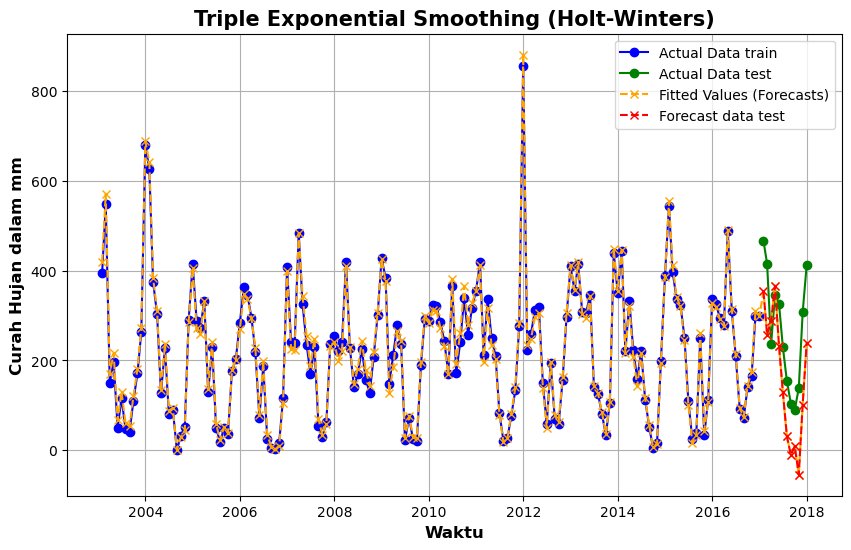

In [37]:
# Plot 
plt.figure(figsize=(10, 6))
plt.plot(train.index,train, label='Actual Data train', marker='o', color='blue')  
plt.plot(test.index,test, label='Actual Data test', marker='o',color='green')  
plt.plot(forecast_df.index, forecast_df, label='Fitted Values (Forecasts)', linestyle='--', marker='x',color='orange')  
plt.plot(forecast_oov.index, forecast_oov, label='Forecast data test', linestyle='--', marker='x',color='red')  
plt.title('Triple Exponential Smoothing (Holt-Winters)', fontsize=15, fontweight='bold')
plt.xlabel('Waktu', fontsize=12, fontweight='bold')
plt.ylabel('Curah Hujan dalam mm', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
rmse_test_TripleSES = hitung_rmse(test['Curah_Hujan'], forecast_oov['Forecast'])
print('RMSE Test:', rmse_test_TripleSES)

RMSE Test: 130.1905840870585


Menggunakan metode Holt winter dengan parameter terbaik  (**alpha, beta, gamma**) yaitu **(0.7000000000000001, 0.1, 0.9**) didapatkan nilai RMSE pada data test sebesar 130,19. Secara eksplorasi terlihat bahwa hasil peramalan pada data test cukup menangkap pola dari data tersebut.

### Decision Tree Regression
Decision Tree adalah salah satu algoritma Machine Learning yang umum digunakan untuk memecahkan permasalahan regresi dan klasifikasi. Seperti namanya, algoritma ini menggunakan model keputusan seperti pohon untuk memprediksi nilai target (regresi) atau memprediksi kelas target (klasifikasi).


Proses pemisahan dimulai dari simpul akar (root node) dan diikuti oleh pohon bercabang yang akhirnya mengarah ke simpul daun (terminal node) yang berisi prediksi atau hasil akhir dari algoritma. Konstruksi pohon keputusan biasanya bekerja dari atas ke bawah, dengan memilih variabel pada setiap langkah yang paling baik dalam membagi himpunan item. Setiap sub-pohon dari model pohon keputusan dapat direpresentasikan sebagai pohon biner di mana sebuah simpul keputusan terbagi menjadi dua simpul berdasarkan kondisi.

Pohon keputusan di mana variabel target atau simpul akhir dapat mengambil nilai kontinu (biasanya bilangan real) disebut pohon regresi yang akan dibahas dalam pelajaran ini. Jika variabel target dapat mengambil sekumpulan nilai diskrit, pohon-pohon ini disebut pohon klasifikasi.

Dalam mengambil pemisah yang tepat, digunakan perhitungan Information Gain.
Information gain merupakan jumlah rata-rata informasi yang dibutuhkan untuk mengidentifikasi label kelas dari sebuah tuple dalam D, juga dikenal sebagai entropi D.

Informasi diukur dalam bit
Diberikan sebuah distribusi probabilitas, informasi yang dibutuhkan untuk
memprediksi suatu peristiwa adalah entropi distribusi tersebut
Entropi memberikan informasi yang dibutuhkan dalam bentuk bit
Informasi yang diharapkan yang dibutuhkan untuk mengklasifikasikan sebuah tuple dalam D adalah dihitung dengan:

$Info(D) = - \sum_{i=1}^{m} p_i  log_2(p_i) $
di mana $p_i$ adalah probabilitas tidak nol bahwa sebarang tuple dalam $D$ termasuk dalam kelas $C_i$ dan diestimasi dengan $|C_{i,D}|/ |D|$

Pada kasus regresi menggunakan decision tree dalam analisis time series, penting untuk memilih variabel yang paling relevan untuk dimasukkan dalam model. Dalam konteks ini, variabel waktu yang dapat digunakan adalah indeks hari, bulan, tahun, dan sebagainya yang relevan dengan data curah hujan. Meskipun dapat dipertimbangkan untuk menggunakan lag dari variabel waktu ini sebagai fitur tambahan, namun karena telah terbukti melalui uji stasioneritas bahwa data sudah stasioner, penggunaan lag mungkin akan menjadi redundan dalam model.

In [39]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

In [40]:
df_dt = create_features(data_ts_index)
df_dt.head()

,Curah_Hujan,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,
2003-01-31,395.2,4,1,1,2003,31,31,5
2003-02-28,547.5,4,1,2,2003,59,28,9
2003-03-31,150.0,0,1,3,2003,90,31,14
2003-04-30,197.1,2,2,4,2003,120,30,18
2003-05-31,50.3,5,2,5,2003,151,31,22


In [41]:
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2003-01-31 to 2017-12-31
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Curah_Hujan  180 non-null    float64
 1   dayofweek    180 non-null    int32  
 2   quarter      180 non-null    int32  
 3   month        180 non-null    int32  
 4   year         180 non-null    int32  
 5   dayofyear    180 non-null    int32  
 6   dayofmonth   180 non-null    int32  
 7   weekofyear   180 non-null    UInt32 
dtypes: UInt32(1), float64(1), int32(6)
memory usage: 7.9 KB


In [42]:
train_dt = df_dt[df_dt.index.year < 2017]
test_dt = df_dt[df_dt.index.year >= 2017]

train_dt_noindex = train_dt.reset_index(drop=True)
test_dt_noindex = test_dt.reset_index(drop=True)

X_train = train_dt_noindex.iloc[:, 1:].values
y_train = train_dt_noindex.iloc[:, 0].values.reshape(-1,1)

X_test = test_dt_noindex.iloc[:, 1:].values
y_test = test_dt_noindex.iloc[:, 0].values.reshape(-1,1)

In [43]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        
        # decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        
        # leaf node
        self.value = value

In [44]:
class DecisionTreeRegressor():
    def __init__(self, min_samples_split=2, max_depth=2):
        
        # inisiasi root node
        self.root = None
        
        # kondisi berhenti
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        best_split = {}
        # Lakukan pemisahan data jika kondisi berhenti belum tercapai
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # mendapatkan split terbaik
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # Mengecek jika information gain > 0
            if best_split["var_red"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["var_red"])
        
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        best_split = {}
        max_var_red = -float("inf")
        # loop pada setiap feature
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop pada setiap nilai feature yang ada di data
            for threshold in possible_thresholds:
                # Mendapatkan split data
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # Mengecek jika data tidak kosong
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # Menghitung variance reduction
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    # Melakukan update jika variance reduction lebih besar
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction
    
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        val = np.mean(Y)
        return val
                
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
        
    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    def predict(self, X):
        ''' function to predict a single data point '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

In [45]:
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=3)
regressor.fit(X_train,y_train)
regressor.print_tree()

X_6 <= 18 ? 6091.372981335007
 left:X_6 <= 5 ? 1745.0771304197115
  left:X_3 <= 2004 ? 5982.383717647062
    left:X_0 <= 2 ? 6373.205
        left:680.0
        right:510.65
    right:X_3 <= 2013 ? 1694.5803140803837
        left:327.65384615384613
        right:424.7
  right:X_3 <= 2014 ? 594.3467129629662
    left:X_1 <= 1 ? 1075.9645061728324
        left:306.8583333333334
        right:237.275
    right:X_0 <= 3 ? 4006.6168055555554
        left:308.575
        right:442.85
 right:X_2 <= 10 ? 6064.3634721592825
  left:X_6 <= 26 ? 1436.3343768328477
    left:X_3 <= 2012 ? 1009.2192846074367
        left:165.01875
        right:236.35
    right:X_3 <= 2006 ? 618.0426897618227
        left:59.40555555555555
        right:114.175
  right:X_2 <= 11 ? 4860.736602715464
    left:X_3 <= 2013 ? 876.8250003865187
        left:275.63181818181823
        right:203.46666666666667
    right:X_3 <= 2010 ? 5078.4000000000015
        left:349.9
        right:497.09999999999997


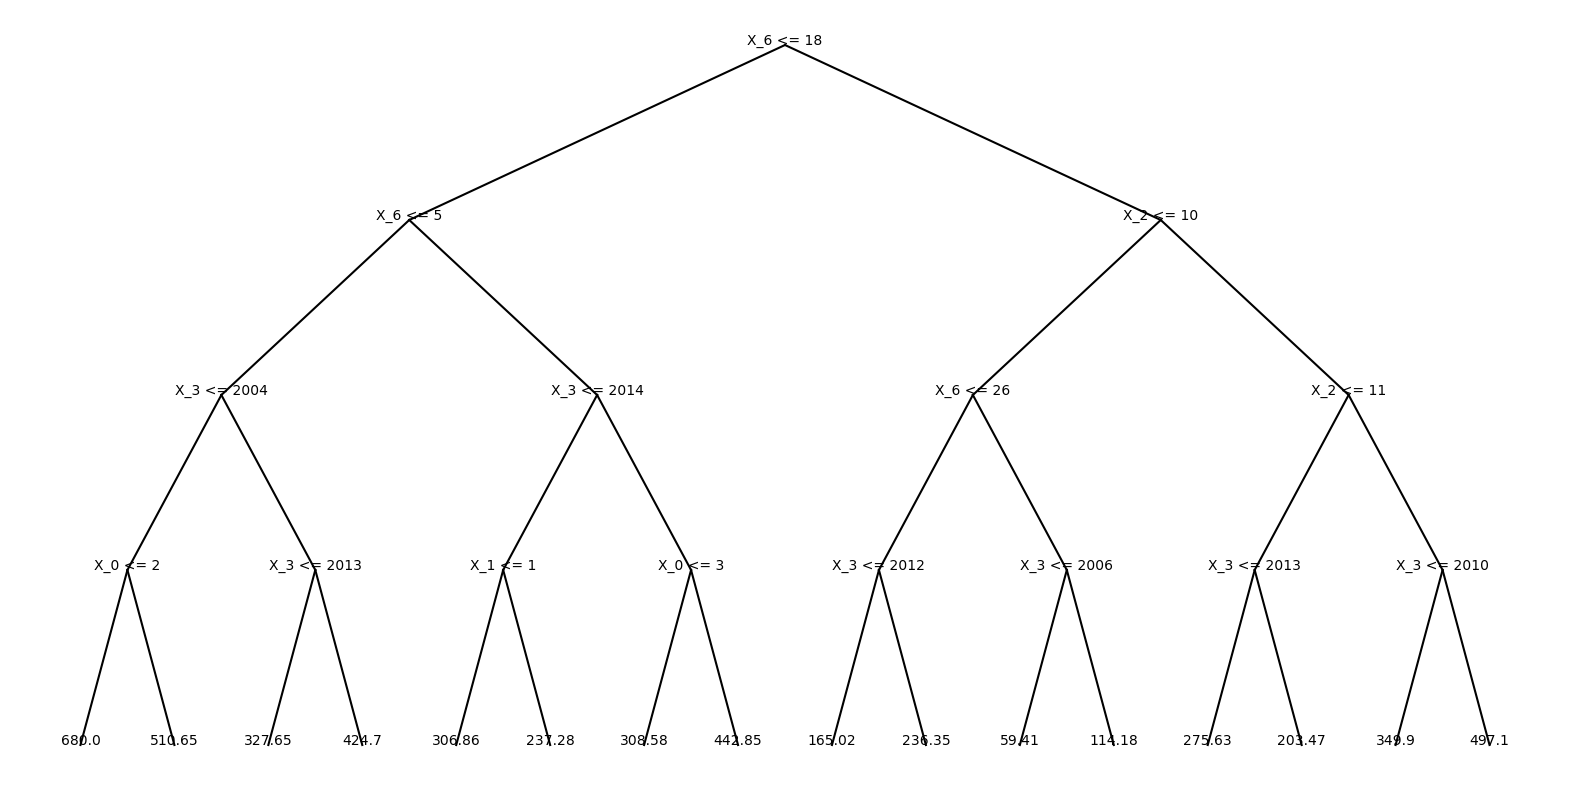

In [46]:
import matplotlib.pyplot as plt

# Define a recursive function to plot the tree
def plot_tree(node, depth=0, parent_pos=None, side=None):
    width = 2 ** (max_depth - depth)
    if parent_pos is None:
        # Root node position
        pos = (0, 0)
    else:
        # Calculate position based on parent's position and side
        x_offset = (-width if side == 'left' else width)
        pos = (parent_pos[0] + x_offset, parent_pos[1] - vertical_distance_between_layers)

    # Plot node
    plt.text(pos[0], pos[1], str(node['text']), horizontalalignment='center')
    
    if 'left' in node:
        # Draw line to left child
        left_pos = plot_tree(node['left'], depth + 1, pos, 'left')
        plt.plot([pos[0], left_pos[0]], [pos[1], left_pos[1]], 'k-')
    
    if 'right' in node:
        # Draw line to right child
        right_pos = plot_tree(node['right'], depth + 1, pos, 'right')
        plt.plot([pos[0], right_pos[0]], [pos[1], right_pos[1]], 'k-')
    
    return pos

# Manually define the tree structure based on the provided text
tree_structure = {
    'text': 'X_6 <= 18',
    'left': {
        'text': 'X_6 <= 5',
        'left': {
            'text': 'X_3 <= 2004',
            'left': {'text': 'X_0 <= 2', 'left': {'text': '680.0'}, 'right': {'text': '510.65'}},
            'right': {'text': 'X_3 <= 2013', 'left': {'text': '327.65'}, 'right': {'text': '424.7'}}
        },
        'right': {
            'text': 'X_3 <= 2014',
            'left': {'text': 'X_1 <= 1', 'left': {'text': '306.86'}, 'right': {'text': '237.28'}},
            'right': {'text': 'X_0 <= 3', 'left': {'text': '308.58'}, 'right': {'text': '442.85'}}
        }
    },
    'right': {
        'text': 'X_2 <= 10',
        'left': {
            'text': 'X_6 <= 26',
            'left': {'text': 'X_3 <= 2012', 'left': {'text': '165.02'}, 'right': {'text': '236.35'}},
            'right': {'text': 'X_3 <= 2006', 'left': {'text': '59.41'}, 'right': {'text': '114.18'}}
        },
        'right': {
            'text': 'X_2 <= 11',
            'left': {'text': 'X_3 <= 2013', 'left': {'text': '275.63'}, 'right': {'text': '203.47'}},
            'right': {'text': 'X_3 <= 2010', 'left': {'text': '349.9'}, 'right': {'text': '497.1'}}
        }
    }
}

# Plot settings
plt.figure(figsize=(20, 10))
max_depth = 4  # Adjust based on your tree depth
vertical_distance_between_layers = 1.5

# Plot the tree
plot_tree(tree_structure)

# Show plot
plt.axis('off')
plt.show()

In [47]:
y_pred = regressor.predict(X_train)
rmse_DT =hitung_rmse(y_train,y_pred)
print("RMSE:",rmse_DT) 

RMSE: 187.53371870249885


In [48]:
df_DT_predict = pd.DataFrame({'y_pred':y_pred,'y_train':train_dt['Curah_Hujan']},index=train_dt.index)
df_DT_predict.head()

,y_pred,y_train
date,,
2003-01-31,510.650000,395.2
2003-02-28,306.858333,547.5
2003-03-31,306.858333,150.0
2003-04-30,237.275000,197.1
2003-05-31,165.018750,50.3


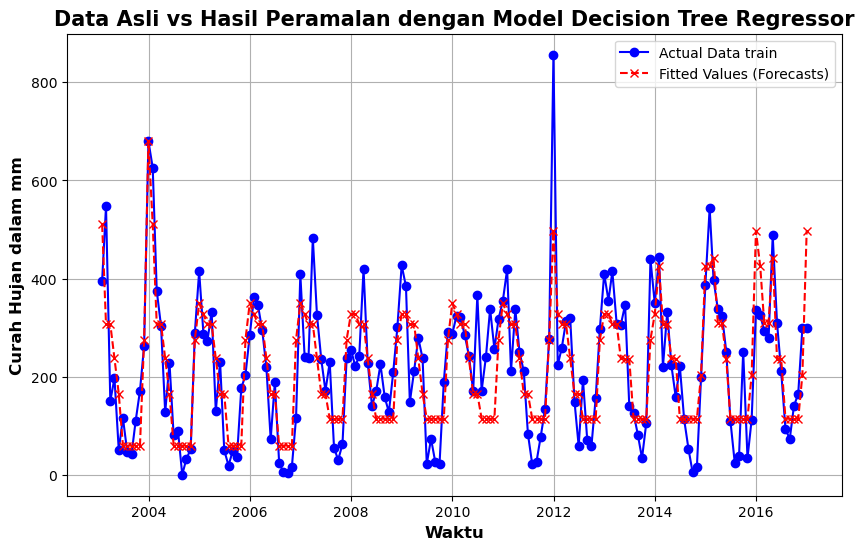

In [49]:
# Plot Data Asli vs Hasil Peramalan
plt.figure(figsize=(10, 6))
plt.plot(df_DT_predict.index,df_DT_predict['y_train'], label='Actual Data train', marker='o', color='blue')  
plt.plot(df_DT_predict.index,df_DT_predict['y_pred'], label='Fitted Values (Forecasts)', linestyle='--', marker='x',color='red') 
plt.title('Data Asli vs Hasil Peramalan dengan Model Decision Tree Regressor', fontsize=15, fontweight='bold')
plt.xlabel('Waktu', fontsize=12, fontweight='bold')
plt.ylabel('Curah Hujan dalam mm', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

#### Grid Search
Grid Search digunakan untuk meneumkan kombinasi hyperparameter terbaik pada decision tree.

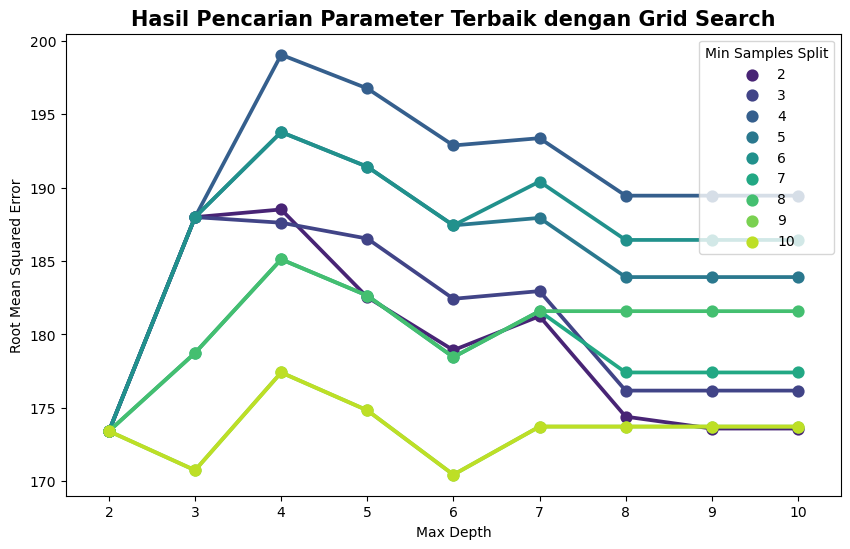

Best Parameters: min_samples_split      9.000000
max_depth              6.000000
rmse                 170.441078
Name: 67, dtype: float64


In [50]:
# Mendefinisikan parameter grid pencarian
param_grid = {
    'min_samples_split': [2, 3, 4, 5,6,7,8,9,10],
    'max_depth': [2, 3, 4, 5,6,7,8,9,10]
}

results = []

# Grid search
for min_samples_split in param_grid['min_samples_split']:
    for max_depth in param_grid['max_depth']:

        regressor = DecisionTreeRegressor(min_samples_split=min_samples_split, max_depth=max_depth)
        
        regressor.fit(X_train, y_train)
        
        y_pred = regressor.predict(X_test)
        
        rmse = hitung_rmse(y_test, y_pred)
        
        results.append({
            'min_samples_split': min_samples_split,
            'max_depth': max_depth,
            'rmse': rmse
        })

results_df = pd.DataFrame(results)

# Parameter kombinasi terbaik
best_params = results_df.loc[results_df['rmse'].idxmin()]

# Plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=results_df, x='max_depth', y='rmse', hue='min_samples_split', palette='viridis')
plt.title('Hasil Pencarian Parameter Terbaik dengan Grid Search', fontsize=15, fontweight='bold')
plt.xlabel('Max Depth')
plt.ylabel('Root Mean Squared Error')
plt.legend(title='Min Samples Split')
plt.show()

# Print parameter terbaik
print(f"Best Parameters: {best_params}")

Berdasarkan hasil grid search, didapatkan hyperparameter decision tree terbaik yang meminimumkan rmse adalah max_depth =6 dan min_sample_spli=9 dengan rmse sebesar 170,44.

In [51]:
regressor = DecisionTreeRegressor(min_samples_split=9, max_depth=6)
regressor.fit(X_train,y_train)
regressor.print_tree()

X_6 <= 18 ? 6091.372981335007
 left:X_6 <= 5 ? 1745.0771304197115
  left:X_3 <= 2004 ? 5982.383717647062
    left:567.1
    right:X_3 <= 2013 ? 1694.5803140803837
        left:X_4 <= 365 ? 1500.5497579343728
                left:X_3 <= 2008 ? 1186.6942837465567
                                left:273.4
                                right:342.5833333333333
                right:418.5
        right:424.7
  right:X_3 <= 2014 ? 594.3467129629662
    left:X_1 <= 1 ? 1075.9645061728324
        left:X_0 <= 2 ? 842.2232056138355
                left:X_4 <= 90 ? 1639.388503213957
                                left:X_3 <= 2003 ? 1410.3950617283954
                                                                left:150.0
                                                                right:269.5
                                right:361.2
                right:X_3 <= 2003 ? 3814.413062130174
                                left:547.5
                                right:X_3 <= 2007 ? 1542.

In [52]:
# Prediksi data train
y_pred = regressor.predict(X_train)
df_DT_train = pd.DataFrame({'y_pred':y_pred,'y_train':train_dt['Curah_Hujan']},index=train_dt.index)
df_DT_train

,y_pred,y_train
date,,
2003-01-31,567.100000,395.2
2003-02-28,547.500000,547.5
2003-03-31,150.000000,150.0
2003-04-30,151.166667,197.1
2003-05-31,50.000000,50.3
...,...,...
2016-08-31,98.960000,73.0
2016-09-30,116.500000,140.0
2016-10-31,98.960000,165.0


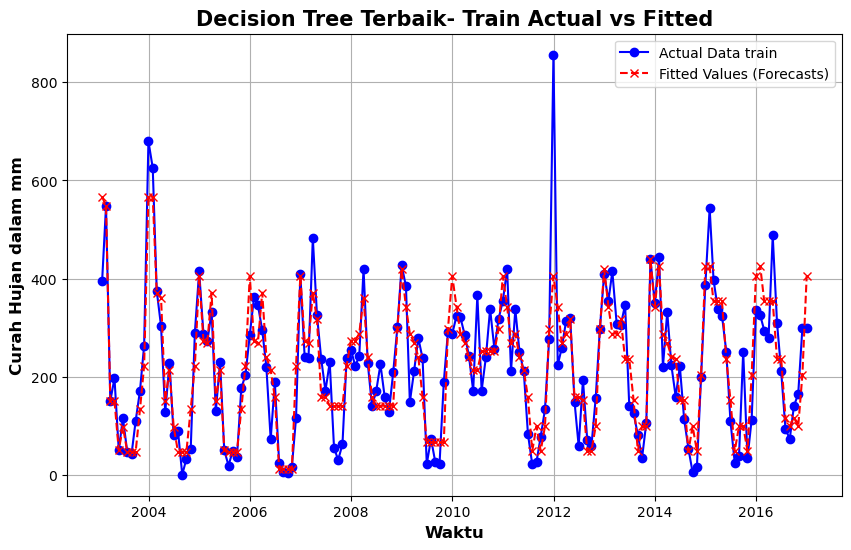

In [53]:
# Plot Data Asli vs Hasil Peramalan
plt.figure(figsize=(10, 6))
plt.plot(df_DT_train.index,df_DT_train['y_train'], label='Actual Data train', marker='o', color='blue')  
plt.plot(df_DT_train.index,df_DT_train['y_pred'], label='Fitted Values (Forecasts)', linestyle='--', marker='x',color='red')
plt.title('Decision Tree Terbaik- Train Actual vs Fitted', fontsize=15, fontweight='bold')
plt.xlabel('Waktu',fontsize=12, fontweight='bold')
plt.ylabel('Curah Hujan dalam mm',fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

Melalui plot di atas dapat ditinjau bahwa model decision tree dapat menangkap sebagian besar pola yang ada pada data train.

#### Forecasting data test

In [54]:
y_pred = regressor.predict(X_test)
df_DT_predict_test = pd.DataFrame({'y_pred':y_pred,'y_test':test_dt['Curah_Hujan']},index=test_dt.index)
df_DT_predict_test

,y_pred,y_test
date,,
2017-01-31,424.700000,466.6
2017-02-28,353.333333,415.0
2017-03-31,353.333333,237.0
2017-04-30,353.333333,346.0
2017-05-31,236.350000,326.1
2017-06-30,236.350000,229.3
2017-07-31,152.560000,154.1
2017-08-31,98.960000,103.8
2017-09-30,116.500000,90.5


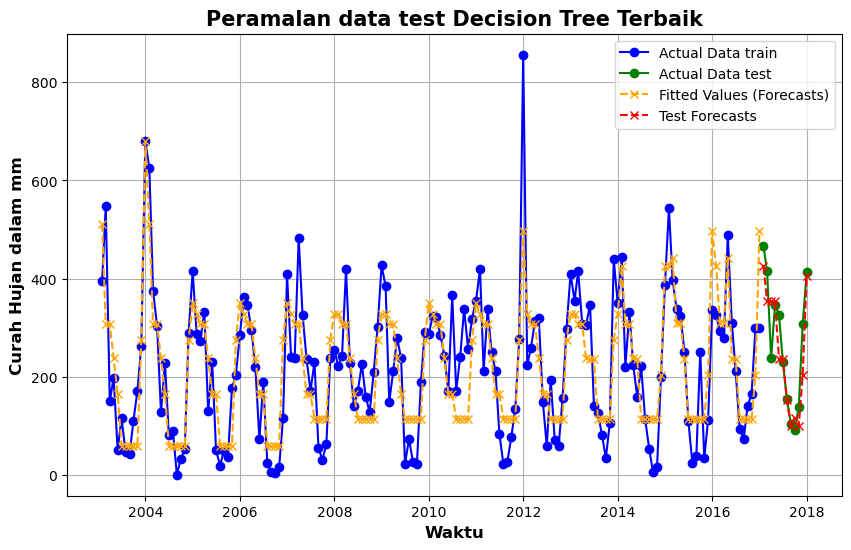

In [55]:
# Plot Data Asli vs Hasil Peramalan
plt.figure(figsize=(10, 6))
plt.plot(df_DT_predict.index,df_DT_predict['y_train'], label='Actual Data train', marker='o', color='blue')
plt.plot(test.index,test, label='Actual Data test', marker='o',color='green') 
plt.plot(df_DT_predict.index,df_DT_predict['y_pred'], label='Fitted Values (Forecasts)', linestyle='--', marker='x',color='orange')
plt.plot(df_DT_predict_test.index,df_DT_predict_test['y_pred'], label='Test Forecasts', linestyle='--', marker='x',color='red')
plt.title('Peramalan data test Decision Tree Terbaik', fontsize=15, fontweight='bold')
plt.xlabel('Waktu',fontsize=12, fontweight='bold')
plt.ylabel('Curah Hujan dalam mm',fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
rmse_DT_test = hitung_rmse(test['Curah_Hujan'], df_DT_predict_test['y_pred'])
print('RMSE Test:', rmse_DT_test)

RMSE Test: 57.974531461221396


Melalui model decision tree dengan hyperparameter terbaik didapatkan RMSE pada data test sebesar 57, 97. Pada plot juga terlihat bahwa hasil peramalan dapat menangkap pola pada data.

### Metode Terbaik Train Test

In [57]:
df_RMSE = pd.DataFrame({'Model': ['Klasifikasi Pegels','Triple Exponential Smoothing (Holt-Winters)','Decision Tree Regressor'],
                        'RMSE Test': [rmse_test_pegels,rmse_test_TripleSES,rmse_DT_test]})
df_RMSE

,Model,RMSE Test
0,Klasifikasi Pegels,114.243047
1,Triple Exponential Smoothing (Holt-Winters),130.190584
2,Decision Tree Regressor,57.974531


Melalui ketiga pemodelan yaitu Klasifikasi Pegels, Holt-Winters, dan Decision Tree Regression didapatkan model terbaik dalam prediksi curah hujan di kalimantan selatan adalah Decision Tree dengan RMSE pada data test yang terkecil sebesar 57,97 di antara 2 model lain. 

### Expanding Window CV
Dalam membangun model, perlu dilakukan evaluasi kinerjanya. *Cross-Validation* adalah metode yang dapat membantu dalam hal ini. Sebagai contoh, teknik yang paling umum digunakan adalah *K-fold-Cross-Validation*, dataset akan dibagi ke dalam beberapa *folds* (lipatan), kemudian model akan dilatih pada semua *folds* kecuali satu dan menguji model pada fold yang tersisa. Langkah ini terus dilakukan hingga menguji model pada setiap *fold* dan metrik akhir akan menjadi rata-rata skor yang diperoleh di setiap *fold*. Hal ini memungkinkan untuk mencegah *overfitting*, dan mengevaluasi kinerja model dengan cara yang lebih kuat daripada *train-test* saja.

Dalam kasus *Time Series*, *Cross-Validation* perlu ada perhatian ekstra. Kita tidak dapat memilih sampel dengan bebas (acak) dan membaginya ke set tes atau set *training* karena tidak masuk akal untuk menggunakan nilai dari masa depan untuk meramalkan nilai di masa lalu. Dengan kata sederhana, kita ingin menghindari melihat ke masa depan ketika kita melatih model. Diperhatikan bahwa terdapat ketergantungan temporal antara pengamatan, dan hal tersebut harus dijaga selama pengujian.

Teknik yang dapat digunakan untuk melakukan *Cross Validation* pada data *time series* salah satunya adalah *Expanding Window Cross Validation*. Dimulai dengan sebagian data untuk *training*, ramalkan titik data berikutnya dan kemudian periksa keakuratan titik data yang diramalkan. Titik data yang diramalkan sama kemudian dimasukkan sebagai bagian dari kumpulan data training berikutnya dan titik data berikutnya diramalkan. Kelebihan dari teknik ini adalah memungkinkan *split* yang banyak dan menjamin tidak terjadinya data *leakage*.

Pada penelitian ini akan dilakukan *Expanding Window CV* dengan rentang untuk *training - validation* adalah data tahun 2003-2016. *Split* pertama dimulai dari tahun 2003-2011 dan tahun 2012 sebagai validasi, kemudian *split* kedua dimulai dari tahun 2003-2012 dan tahun 2013 sebagai validasi, dan begitu seterusnya hingga terakhir data tahun 2016 sebagai validasi dan 2003-2015 sebagai data *training*. Terbentuk total 5 split, kemudian akan dicari rata-rata RMSE untuk menentukan model yang terbaik.
Data tahun 2017 diperlakukan sebagai data tes yang independen dari data *train* dan validasi untuk pengujian model terbaik.
Diperhatikan bahwa model yang diujikan pada *Expanding Window CV* adalah model dengan parameter terbaik yang diperoleh pada data training sebelum dibagi dalam validasi.

![Expanding Window CV](https://www.researchgate.net/publication/371672466/figure/fig3/AS:11431281168665578@1687076067648/Illustration-of-expanding-window-walk-forward-validation-method.png)

| Validation Split | Training | Validation |
| :-: | :-: | :-: |
| 1 | 2003-2011 | 2012
| 2 | 2003-2012 | 2013
| 3 | 2003-2013 | 2014
| 4 | 2003-2014 | 2015
| 5 | 2003-2015 | 2016


In [58]:
# Definisi tahun validasi
validation_years = [2012, 2013, 2014, 2015, 2016]

datasets = {}

# Melakukan Looping untuk setiap tahun validasi
for i, validation_year in enumerate(validation_years, start=1):
    # Memisahkan data train dan validation berdasarkan tahun
    # Training set dari awal hingga tahun sebelum tahun validasi
    train_set = train[:f'{validation_year-1}']
    # Validation set hanya tahun validasi
    validation_set = train[f'{validation_year}-01-01':f'{validation_year}-12-31']
    # Simpan di dictionary datasets
    datasets[f'train_cv_{i}'] = train_set
    datasets[f'validation_cv_{i}'] = validation_set
# dictionary datasets berisi data train dan validation untuk setiap tahun validasi

In [59]:
pegels_cv = pegels_notren_additive_seasonal_predict(datasets['train_cv_1']['Curah_Hujan'],12, 0.1, 0.4)
prediction_cv = pegels_cv[['Forecast']].tail(12).set_index(datasets['validation_cv_1'].index)
prediction_cv['validation'] = datasets['validation_cv_1']['Curah_Hujan']
prediction_cv

# RMSE
rmse_cv = hitung_rmse(datasets['validation_cv_1']['Curah_Hujan'], prediction_cv['Forecast'])
print('RMSE CV:', rmse_cv)

RMSE CV: 97.58712357363795


#### CV model Pegels

In [60]:
# Expanding Window CV model Pegels
rmse_values = []

# Looping untuk setiap fold
for i in range(1, 6):
    # Membuat prediksi menggunakan training set
    pegels_cv = pegels_notren_additive_seasonal_predict(datasets[f'train_cv_{i}']['Curah_Hujan'], 12, 0.1, 0.4)
    prediction_cv = pegels_cv[['Forecast']].tail(12).set_index(datasets[f'validation_cv_{i}'].index)
    prediction_cv['validation'] = datasets[f'validation_cv_{i}']['Curah_Hujan']
    
    # Hitung RMSE untuk fold saat ini
    rmse_cv = hitung_rmse(datasets[f'validation_cv_{i}']['Curah_Hujan'], prediction_cv['Forecast'])
    # Simpan RMSE ke list
    rmse_values.append(rmse_cv)

# Membuat DataFrame RMSE
rmse_df_pegels = pd.DataFrame({'CV': range(1, 6), 'RMSE': rmse_values})

# Menambahkan rata-rata RMSE
rmse_df_pegels.loc['Average'] = ['Average', rmse_df_pegels['RMSE'].mean()]

# Print RMSE
print(rmse_df_pegels)

              CV        RMSE
0              1   97.587124
1              2   78.637325
2              3  155.943580
3              4  178.112407
4              5  112.056948
Average  Average  124.467477


#### CV model Triple Exponential Smoothing

In [61]:
# Expanding Window CV model Triple Exponential Smoothing
rmse_values = []

# Looping untuk setiap fold
for i in range(1, 6):
    # Membuat prediksi menggunakan training set
    triple_exp_cv = triple_exponential_smoothing_forecast(datasets[f'train_cv_{i}']['Curah_Hujan'], 12,0.30000000000000004, 0.1, 0.9, 12)
    forecast_df = pd.DataFrame({'Forecast': triple_exp_cv})
    prediction_cv =  forecast_df[['Forecast']].tail(12).set_index(datasets[f'validation_cv_{i}'].index)
    prediction_cv['validation'] = datasets[f'validation_cv_{i}']['Curah_Hujan']
    
    # Hitung RMSE untuk fold saat ini
    rmse_cv = hitung_rmse(datasets[f'validation_cv_{i}']['Curah_Hujan'], prediction_cv['Forecast'])
    
    # Simpan RMSE ke list
    rmse_values.append(rmse_cv)

# Membuat DataFrame RMSE
rmse_df_triple = pd.DataFrame({'CV': range(1, 6), 'RMSE': rmse_values})

# Menambahkan rata-rata RMSE
rmse_df_triple.loc['Average'] = ['Average', rmse_df_triple['RMSE'].mean()]

# Print RMSE
print(rmse_df_triple)

              CV        RMSE
0              1  276.221672
1              2  287.386124
2              3  137.914394
3              4  164.274871
4              5  168.631020
Average  Average  206.885616


#### CV model Decision Tree

In [62]:
# Expanding Window CV model Decision Tree Regressor
# List untuk menyimpan RMSE
rmse_values = []

# Looping untuk setiap fold
for i in range(1, 6):
    # Membuat fitur untuk training dan validation datasets
    df_dt_train = create_features(datasets[f'train_cv_{i}'])
    df_dt_validation = create_features(datasets[f'validation_cv_{i}'])
    
    # Reset index
    train_dt_noindex = df_dt_train.reset_index(drop=True)
    valid_dt_noindex = df_dt_validation.reset_index(drop=True)
    
    # Pisahkan fitur dan target
    X_train = train_dt_noindex.iloc[:, 1:].values
    y_train = train_dt_noindex.iloc[:, 0].values.reshape(-1,1)
    X_valid = valid_dt_noindex.iloc[:, 1:].values
    y_valid = valid_dt_noindex.iloc[:, 0].values.reshape(-1,1)
    
    # Training model Decision Tree
    regressor = DecisionTreeRegressor(min_samples_split=9, max_depth=6)
    regressor.fit(X_train, y_train)
    
    # Prediksi
    y_pred = regressor.predict(X_valid)
    df_DT_predict_valid = pd.DataFrame({'y_pred': y_pred, 'y_test': valid_dt_noindex.iloc[:, 0].values}, index=df_dt_validation.index)
    
    # Hitung RMSE untuk fold saat ini
    rmse_cv = np.sqrt(hitung_rmse(df_DT_predict_valid['y_test'], df_DT_predict_valid['y_pred']))
    
    # Simpan RMSE ke list
    rmse_values.append(rmse_cv)

# Dataframe RMSE
rmse_df_DT = pd.DataFrame({'CV': range(1, 6), 'RMSE': rmse_values})

# Hitung rata-rata RMSE
rmse_df_DT.loc['Average'] = ['Average', rmse_df_DT['RMSE'].mean()]

# Print RMSE
print(rmse_df_DT)

              CV       RMSE
0              1   9.211224
1              2   9.774576
2              3  10.950226
3              4  10.968575
4              5  10.704873
Average  Average  10.321895


#### Model Terbaik Expanding Window CV


In [63]:
# Gabungkan RMSE dari model-model
RMSE_cv = pd.concat([rmse_df_pegels, rmse_df_triple, rmse_df_DT], axis=1)
# berikan nama kolom model
RMSE_cv.columns = ['CV Pegels', 'RMSE Pegels', 'CV Triple', 'RMSE Triple', 'CV DT', 'RMSE DT']
RMSE_cv

,CV Pegels,RMSE Pegels,CV Triple,RMSE Triple,CV DT,RMSE DT
0,1,97.587124,1,276.221672,1,9.211224
1,2,78.637325,2,287.386124,2,9.774576
2,3,155.943580,3,137.914394,3,10.950226
3,4,178.112407,4,164.274871,4,10.968575
4,5,112.056948,5,168.631020,5,10.704873
Average,Average,124.467477,Average,206.885616,Average,10.321895


In [64]:
print(RMSE_cv)

        CV Pegels  RMSE Pegels CV Triple  RMSE Triple    CV DT    RMSE DT
0               1    97.587124         1   276.221672        1   9.211224
1               2    78.637325         2   287.386124        2   9.774576
2               3   155.943580         3   137.914394        3  10.950226
3               4   178.112407         4   164.274871        4  10.968575
4               5   112.056948         5   168.631020        5  10.704873
Average   Average   124.467477   Average   206.885616  Average  10.321895


Hasil Expanding Window Cross Validation untuk metode Pegels, Triple Exponential Smoothing, dan Decision Tree Regression menunjukkan perbedaan performa masing-masing metode dalam hal akurasi dan kesalahan. Metode Pegels memiliki rata-rata CV sebesar 124.47 dan RMSE sebesar 124.47, menunjukkan performa yang bervariasi tetapi relatif stabil dalam memprediksi nilai dengan kesalahan yang sedang. Triple Exponential Smoothing menunjukkan performa yang lebih baik pada CV dengan rata-rata 206.89 dan RMSE yang lebih rendah pada 137.91, mengindikasikan akurasi yang cukup baik dalam menangani data dengan fluktuasi musiman dan tren. Sementara itu, Decision Tree Regression memiliki nilai CV dan RMSE rata-rata masing-masing sebesar 10.32 dan 10.32, menunjukkan kinerja yang lebih konsisten dan kesalahan yang lebih kecil dibandingkan metode lainnya, menunjukkan keunggulan dalam akurasi prediksi meskipun dengan variasi yang lebih rendah. Secara keseluruhan, Decision Tree Regression tampak sebagai metode yang paling stabil dan akurat di antara ketiga metode tersebut.

### Forecasting 1 Tahun ke depan (2018) dengan model terbaik

#### Forecasting pada data test

Diperhatikan bahwa Decision Tree merupakan metode terbaik yang sama-sama didapatkan pada metode train-test split dan metode Expanding Window CV. Sehingga akan didapatkan hasil yang sama untuk prediksi data test curah hujan yaitu menghasilkan RMSE sebesar 57,97. Hal ini menunjukkan bahwa metode Decision tree adalah metode yang sangat baik dalam menggambarkan pola data curah hujan provinsi kalimantan selatan.

#### Forecasting 1 tahun ke depan (2018)

In [65]:
Prediksi_2018 = pd.DataFrame({'date': pd.date_range(start='2018-01-31',end='2018-12-31',freq='M'),'Curah_Hujan':np.nan})
Prediksi_2018

,date,Curah_Hujan
0,2018-01-31,NaN
1,2018-02-28,NaN
2,2018-03-31,NaN
3,2018-04-30,NaN
4,2018-05-31,NaN
5,2018-06-30,NaN
6,2018-07-31,NaN
7,2018-08-31,NaN
8,2018-09-30,NaN
9,2018-10-31,NaN


In [66]:
# set date as index
Prediksi_2018 = Prediksi_2018.set_index('date')
# Membuat fitur berdasarkan tanggal
Prediksi_2018 = create_features(Prediksi_2018)
Prediksi_2018

,Curah_Hujan,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,
2018-01-31,NaN,2,1,1,2018,31,31,5
2018-02-28,NaN,2,1,2,2018,59,28,9
2018-03-31,NaN,5,1,3,2018,90,31,13
2018-04-30,NaN,0,2,4,2018,120,30,18
2018-05-31,NaN,3,2,5,2018,151,31,22
2018-06-30,NaN,5,2,6,2018,181,30,26
2018-07-31,NaN,1,3,7,2018,212,31,31
2018-08-31,NaN,4,3,8,2018,243,31,35
2018-09-30,NaN,6,3,9,2018,273,30,39


In [67]:
# prediksi data 2018 dengan model terbaik
X_pred = Prediksi_2018.iloc[:, 1:].values
y_pred = regressor.predict(X_pred)
# membuat kolom hasil peramalan
Prediksi_2018['Curah_Hujan'] = y_pred
Prediksi_2018

,Curah_Hujan,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,
2018-01-31,447.333333,2,1,1,2018,31,31,5
2018-02-28,343.350000,2,1,2,2018,59,28,9
2018-03-31,343.350000,5,1,3,2018,90,31,13
2018-04-30,316.733333,0,2,4,2018,120,30,18
2018-05-31,230.028571,3,2,5,2018,151,31,22
2018-06-30,140.700000,5,2,6,2018,181,30,26
2018-07-31,140.983333,1,3,7,2018,212,31,31
2018-08-31,49.420000,4,3,8,2018,243,31,35
2018-09-30,49.420000,6,3,9,2018,273,30,39


In [68]:
Prediksi_2018[['Curah_Hujan']].describe()

,Curah_Hujan
count,12.000000
mean,221.193214
std,134.000416
min,49.420000
25%,129.012500
50%,192.864286
75%,343.350000
max,447.333333


Hasil peramalan curah hujan provinsi kalimantan selatan pada tahun 2018 menunjukkan bahwa rata-rata sebesar 221,19, apabila mengacu pada kategori BMKG maka tergolong curah hujan menenngah.
Diperhatikan bahwa sepanjang tahun 2018 diprediksi curah hujan dengan nilai yang tertinggi ada pada bulan januari dengan curah hujan sebesar 447,33 mm jika. Selain itu pada bulan Agustus dan September dengan curah hujan sebesar 49,42 merupakan yang terendah.

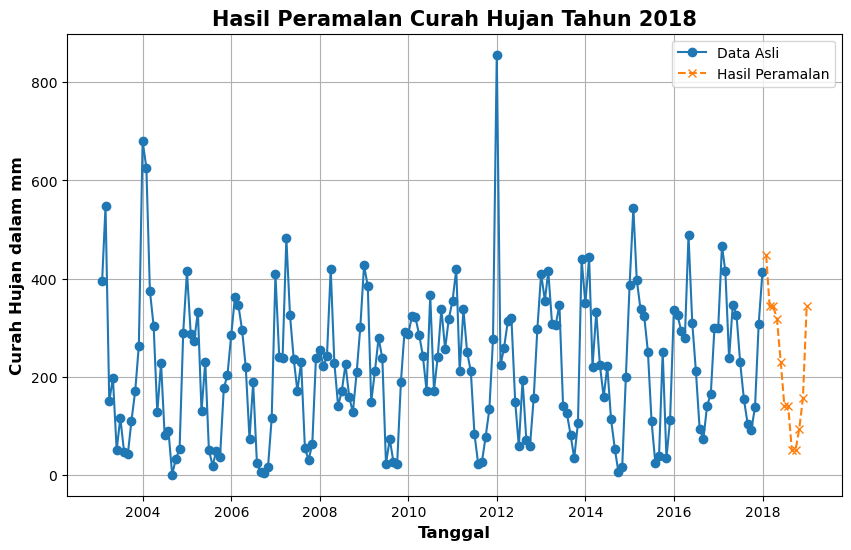

In [69]:
# Plot hasil peramalan
plt.figure(figsize=(10, 6))
plt.plot(data_ts_index.index,data_ts_index['Curah_Hujan'], label='Data Asli', marker='o')
plt.plot(Prediksi_2018.index,Prediksi_2018['Curah_Hujan'], label='Hasil Peramalan', linestyle='--', marker='x')
plt.title('Hasil Peramalan Curah Hujan Tahun 2018', fontsize=15, fontweight='bold')
plt.xlabel('Tanggal', fontsize=12, fontweight='bold')
plt.ylabel('Curah Hujan dalam mm', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Kesimpulan

Banjir merupakan bencana alam yang sering terjadi di Kalimantan Selatan, menimbulkan kerugian materi serta dampak signifikan terhadap aspek sosial dan budaya masyarakat. Banjir sering kali dipicu oleh curah hujan tinggi dalam waktu singkat. Penelitian ini bertujuan mengembangkan model prediksi curah hujan dengan pendekatan statistik klasik, yaitu Klasifikasi Pegels dan Holt-Winters (Triple Exponential Smoothing), serta metode machine learning terbaru yaitu Decision Tree Regression. Root Mean Squared Error (RMSE) digunakan untuk mengevaluasi performa model, dengan model terbaik dipilih berdasarkan RMSE terkecil. Teknik Expanding Window Cross Validation diterapkan untuk memastikan model dapat menggambarkan pola hujan di Kalimantan Selatan, dengan membagi data menjadi lima set pelatihan dan melakukan prediksi pada setiap set.

Hasil penelitian menunjukkan bahwa metode machine learning Decision Tree Regression dengan parameter terbaik memiliki rata-rata RMSE terendah dibandingkan dua model lainnya. Pada data uji, RMSE sebesar 57,97 diperoleh, menunjukkan kemampuan eksploratif model dalam menggambarkan pola pada data latih dan uji dengan baik. Model ini dinilai layak sebagai acuan untuk prediksi curah hujan di Kalimantan Selatan. Selanjutnya, model Decision Tree Regression digunakan untuk memprediksi curah hujan pada tahun 2018, dengan hasil prediksi rata-rata sebesar 221,19 mm, curah hujan tertinggi pada bulan Januari sebesar 447,33 mm, dan terendah pada bulan Agustus dan September sebesar 49,42 mm.

Berdasarkan hasil ini, saran untuk pemerintah Kalimantan Selatan adalah bahwa dengan rata-rata curah hujan tahun 2018 sebesar 221,19 mm yang termasuk dalam kategori sedang menurut BMKG, kebijakan pembangunan infrastruktur yang memerlukan curah hujan sedang dapat dipertimbangkan. Namun, antisipasi diperlukan untuk bulan Januari yang memiliki curah hujan tertinggi, guna mengatasi potensi banjir. Keberhasilan model Decision Tree Regression dalam meramalkan curah hujan di Kalimantan Selatan menunjukkan potensinya sebagai salah satu alat dalam proses peramalan curah hujan di BMKG provinsi Kalimantan Selatan. Model ini dapat terus dikembangkan dengan menyesuaikan data-data terbaru yang ada